In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#pd.set_option('display.max_columns', None) 

### Expolatory Data Analysis

In [2]:
data=pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df=data

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None) 


In [6]:
df.shape

(1460, 81)

In [7]:
# there are 1460 rows and 81 columns in the above data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
### here the data are categorical as well as numerical and there are lots of missing values.

In [10]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Here in most of the cases the mean is greater than median that means the data is positively skewed
   or  right skewed.

In [11]:
 feature_withnan=df.columns[df.isnull().any()]
print(feature_withnan)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


19 columns has missing values
lets find out the relaionship between missing values and dependent variable


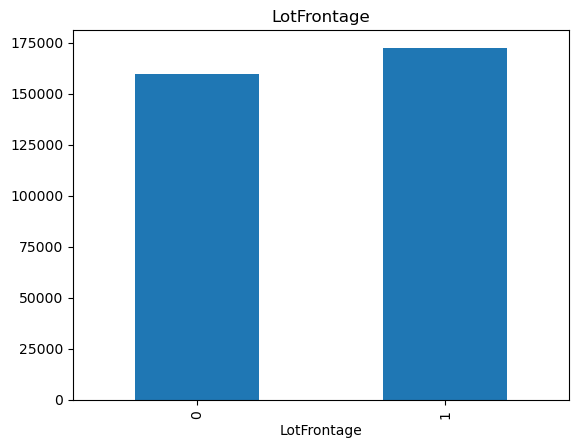

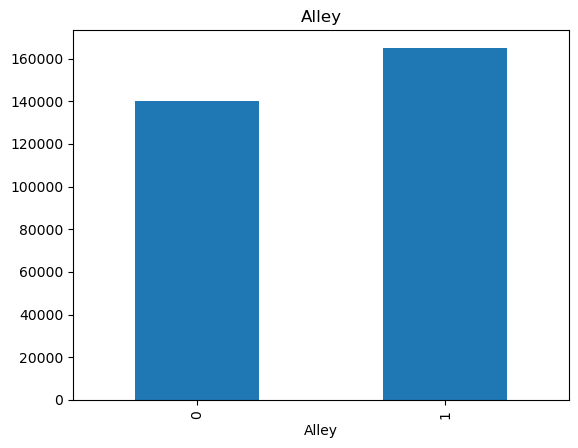

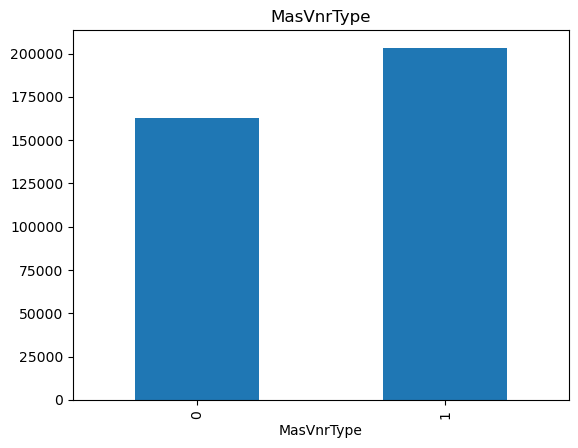

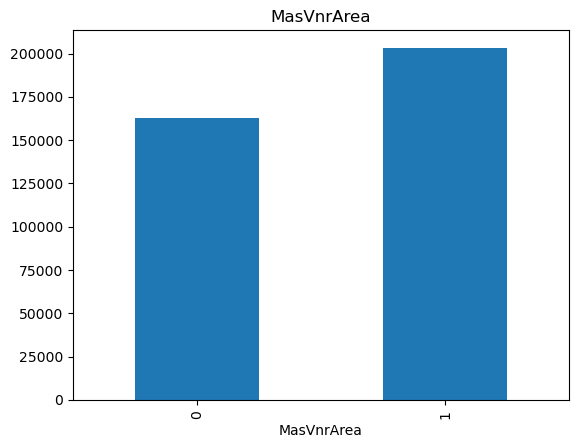

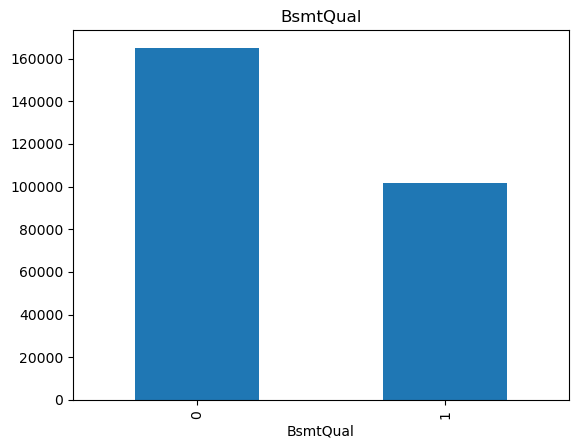

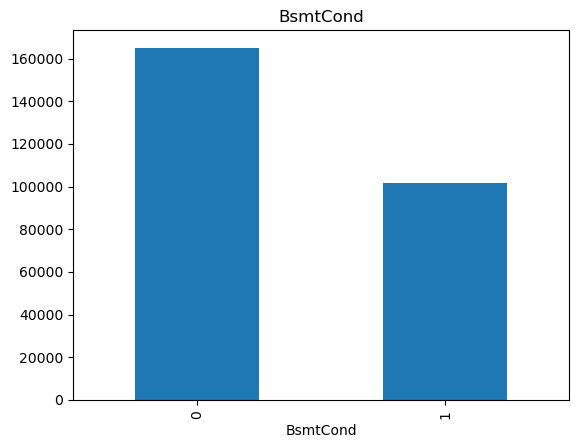

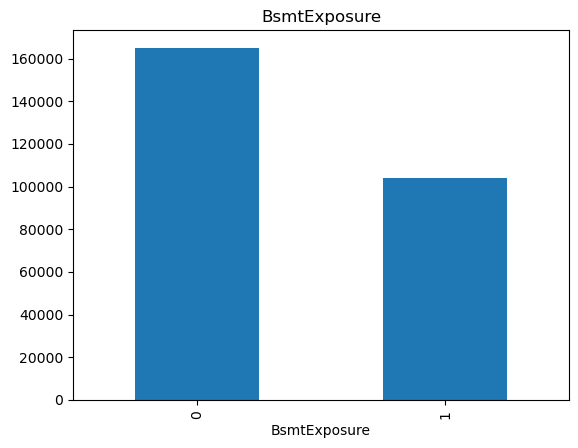

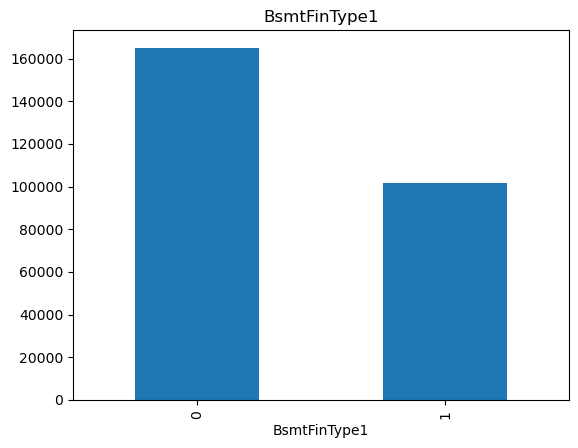

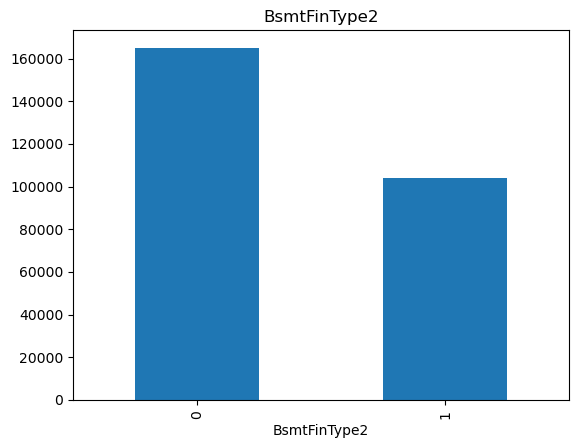

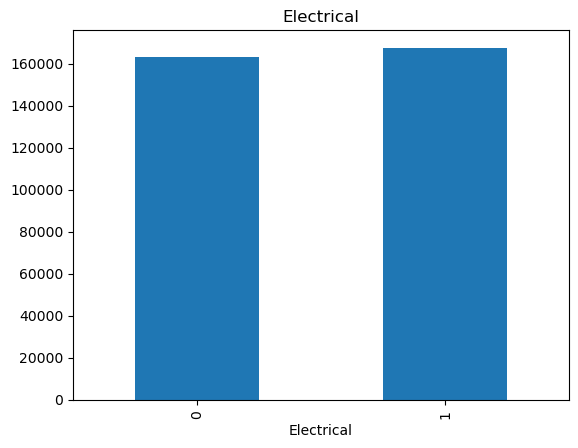

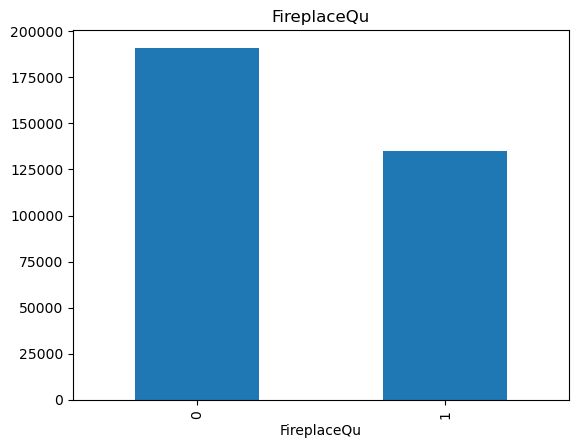

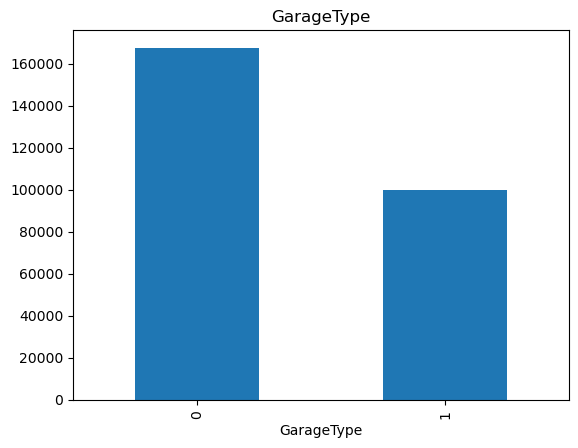

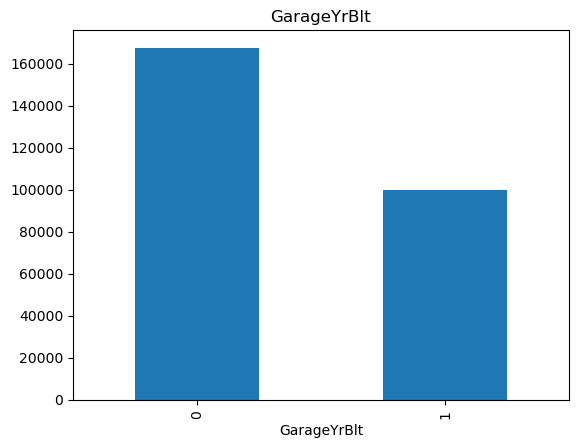

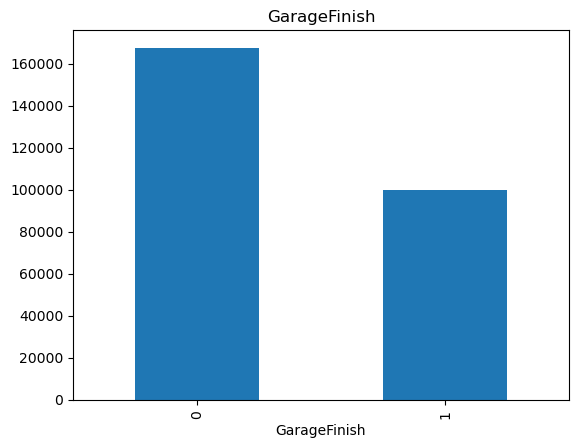

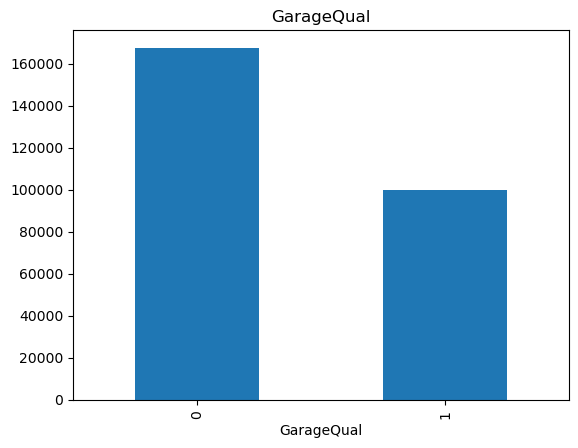

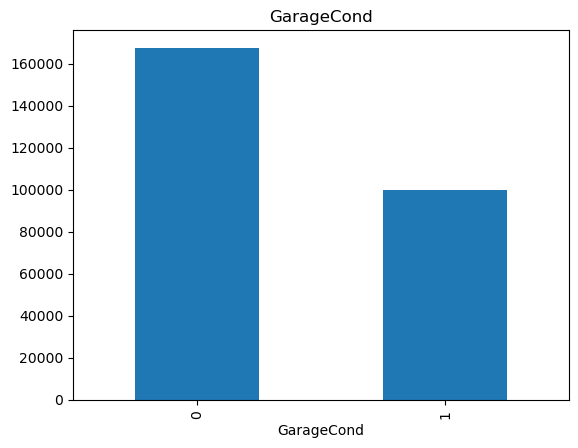

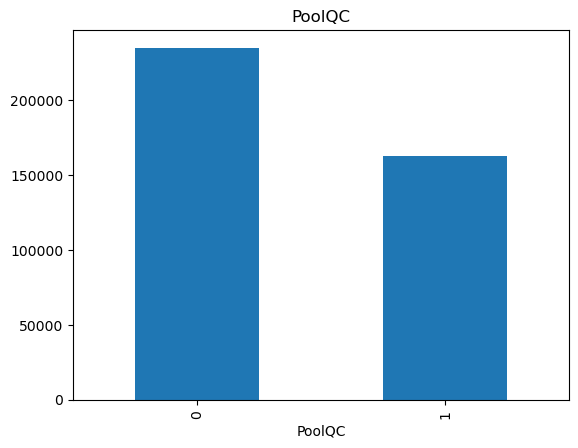

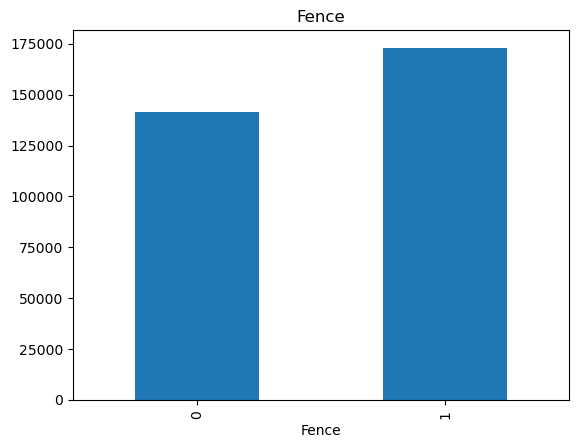

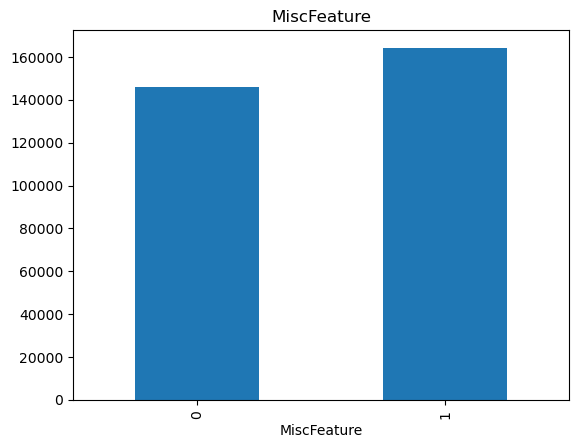

In [12]:
for feature in feature_withnan:
    df[feature]=np.where(df[feature].isnull(),1,0)
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

most of the feature having missing values are related to dependent variable

### Numerical Variable

In [13]:
numerical_feature=[features for features in df.columns if df[features].dtype!='O']
print(len(numerical_feature))

54


In [14]:
df[numerical_feature].head()

,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,1,60,0,8450,1,7,5,2003,2003,0,...,0,0,0,1,1,1,0,2,2008,208500
1,2,20,0,9600,1,6,8,1976,1976,0,...,0,0,0,1,1,1,0,5,2007,181500
2,3,60,0,11250,1,7,5,2001,2002,0,...,0,0,0,1,1,1,0,9,2008,223500
3,4,70,0,9550,1,7,5,1915,1970,0,...,0,0,0,1,1,1,0,2,2006,140000
4,5,60,0,14260,1,8,5,2000,2000,0,...,0,0,0,1,1,1,0,12,2008,250000


Temporal Variable = Those variable contaning date and time.

In [15]:
tempo_feature=[feature for feature in numerical_feature if 'Yr'in feature or 'Year' in feature]

In [16]:
tempo_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Discreate Variable

In [17]:
discrete_features=[features for features in numerical_feature if len(df[features].unique())<20]

In [18]:
print(len(discrete_features))

34


In [19]:
df[discrete_features].head()

,MSSubClass,LotFrontage,Alley,OverallQual,OverallCond,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,...,GarageFinish,GarageCars,GarageQual,GarageCond,PoolArea,PoolQC,Fence,MiscFeature,MoSold,YrSold
0,60,0,1,7,5,0,0,0,0,0,...,0,2,0,0,0,1,1,1,2,2008
1,20,0,1,6,8,0,0,0,0,0,...,0,2,0,0,0,1,1,1,5,2007
2,60,0,1,7,5,0,0,0,0,0,...,0,2,0,0,0,1,1,1,9,2008
3,70,0,1,7,5,0,0,0,0,0,...,0,3,0,0,0,1,1,1,2,2006
4,60,0,1,8,5,0,0,0,0,0,...,0,3,0,0,0,1,1,1,12,2008


Relationship between discrete features and dependent variable

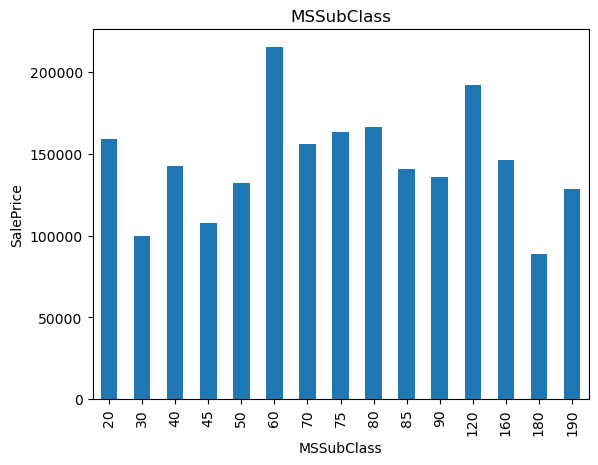

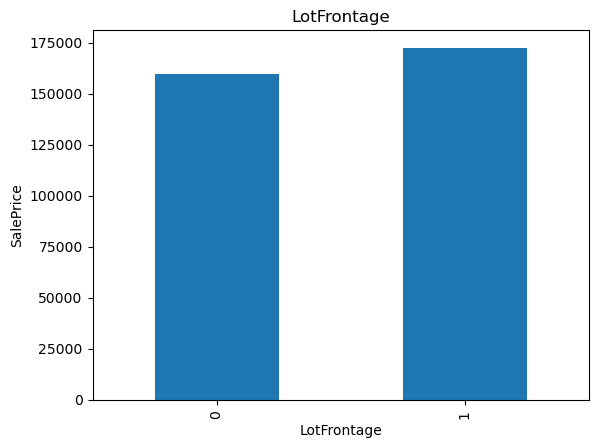

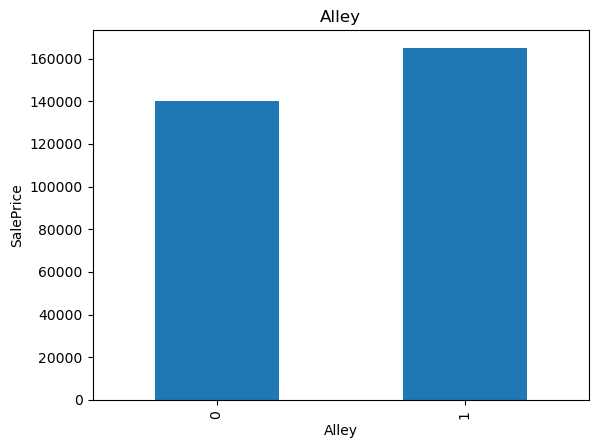

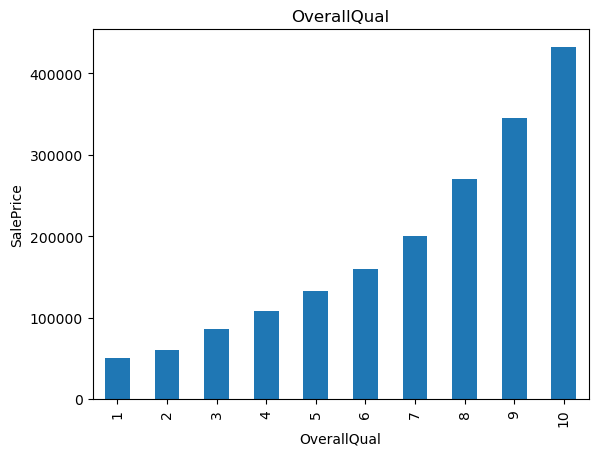

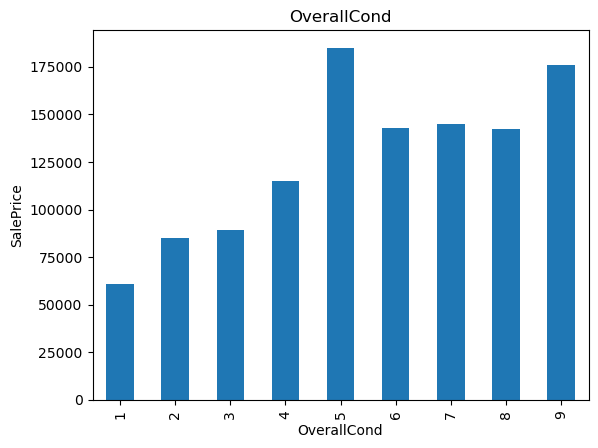

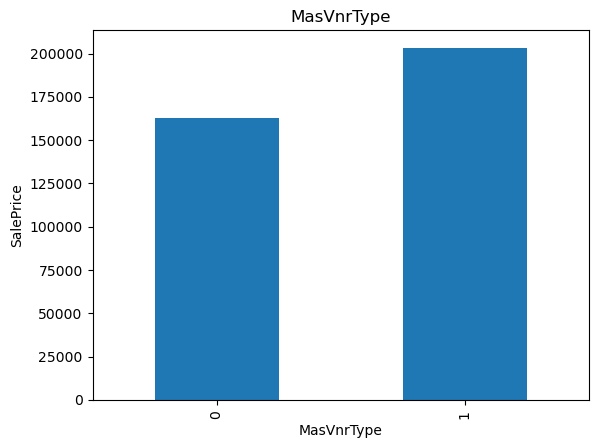

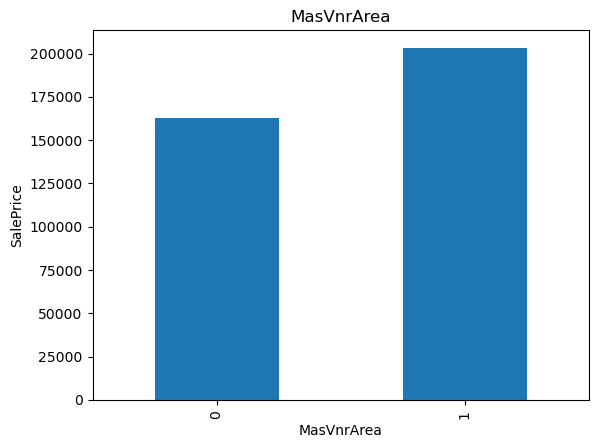

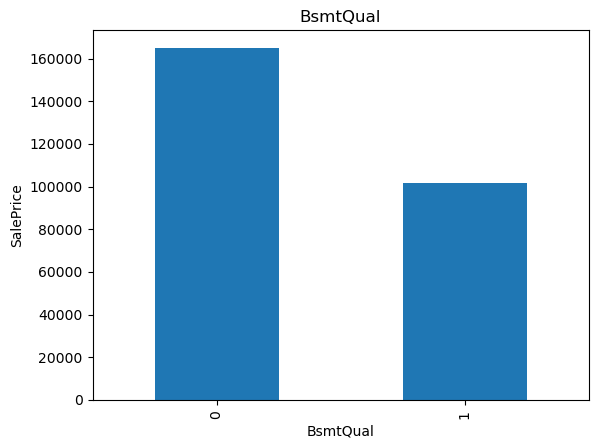

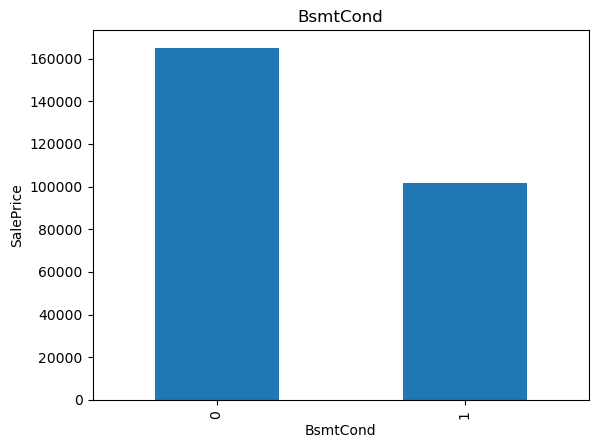

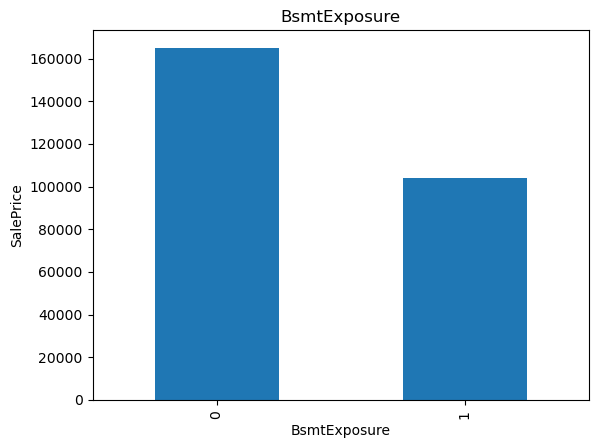

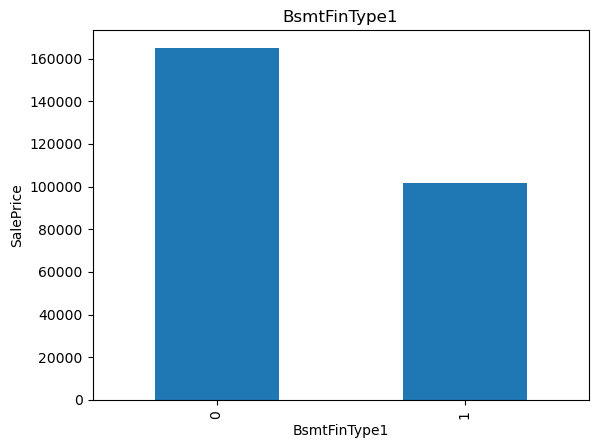

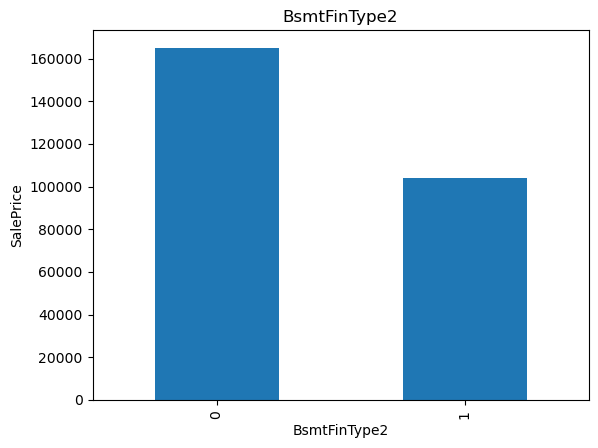

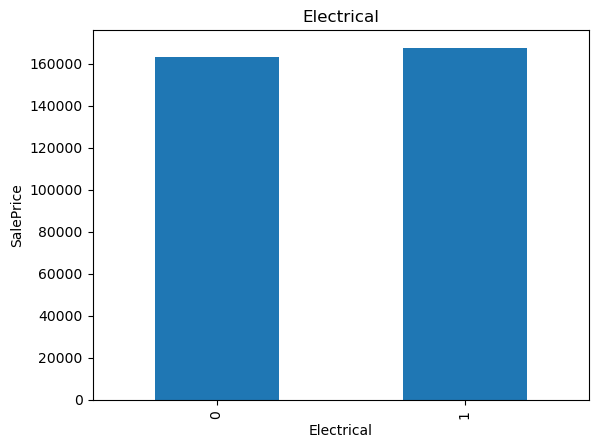

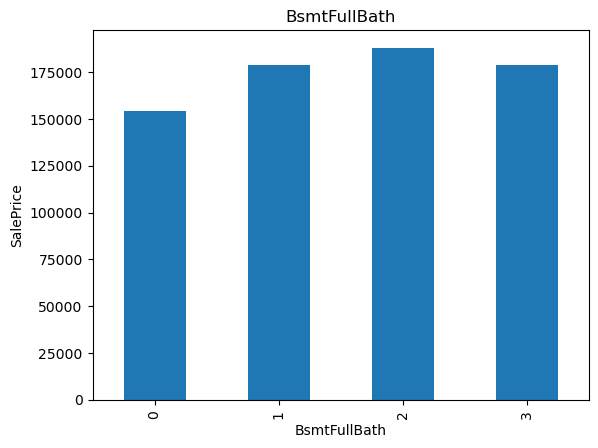

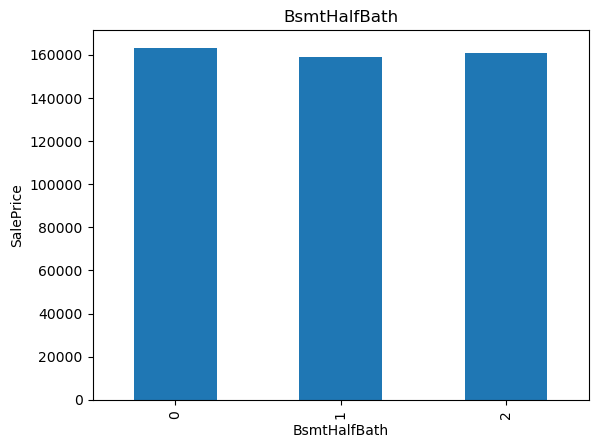

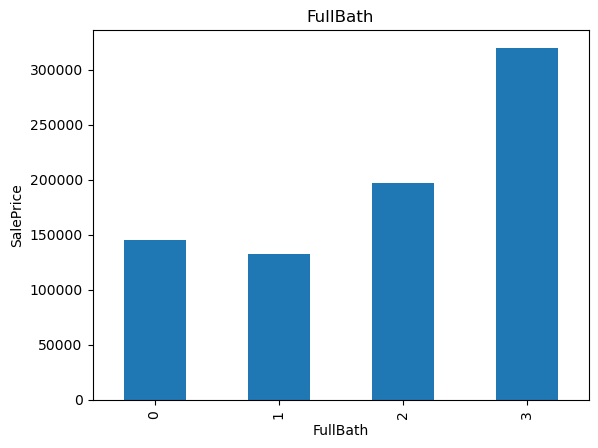

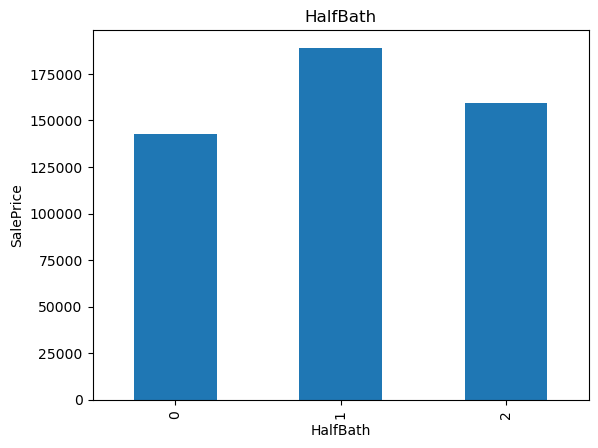

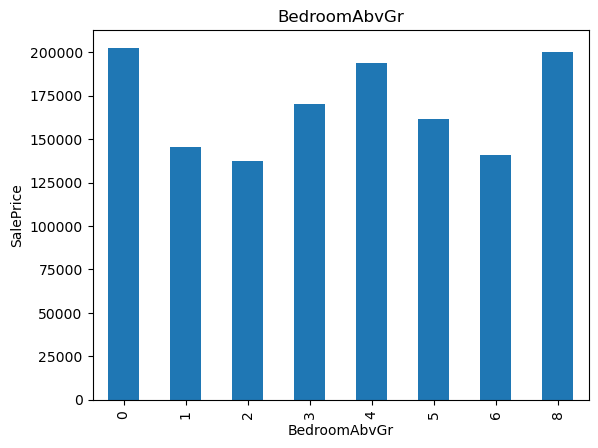

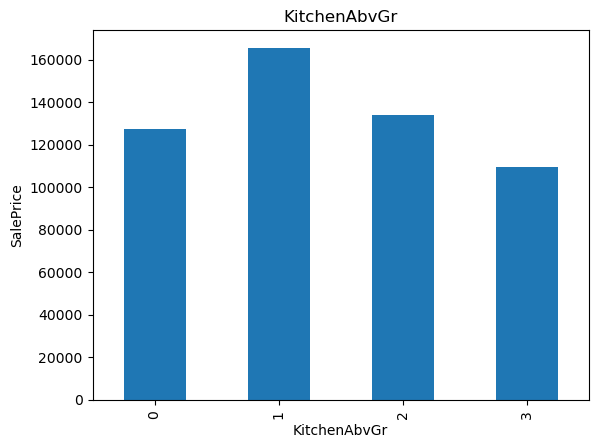

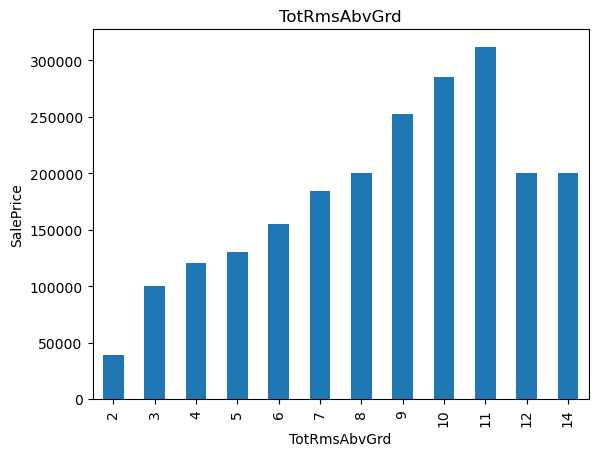

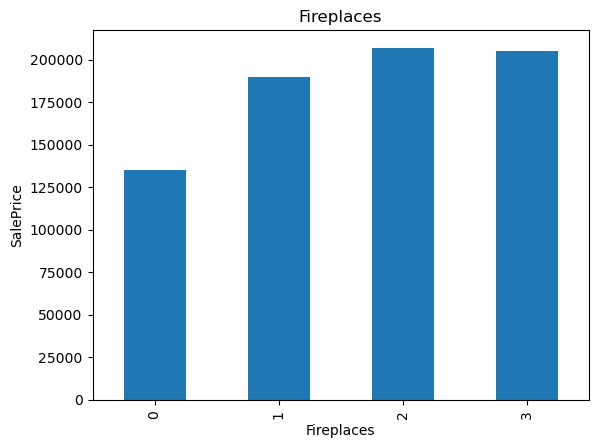

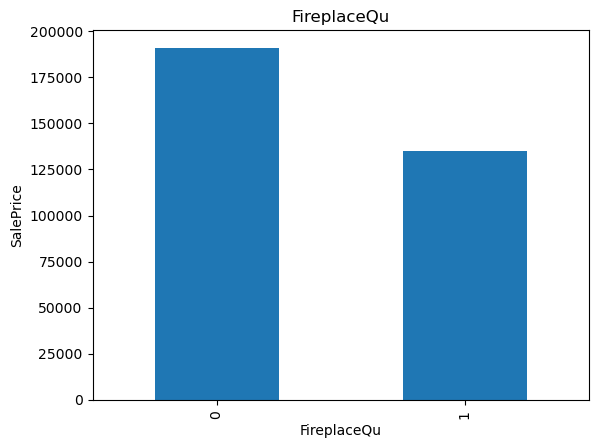

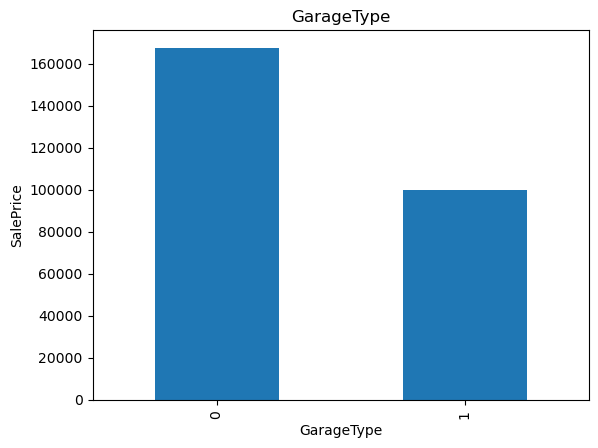

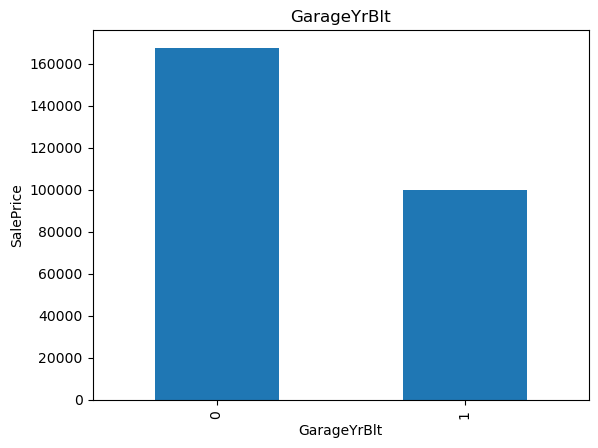

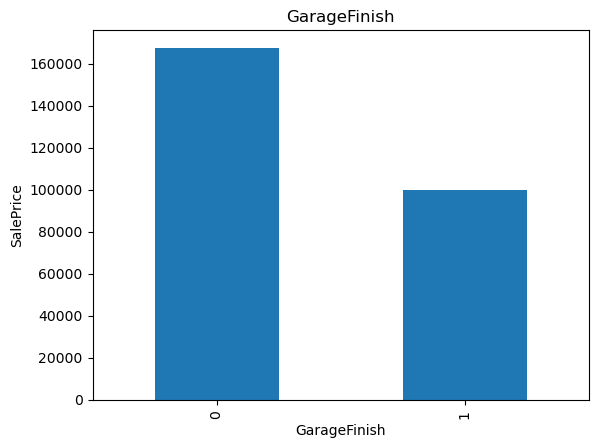

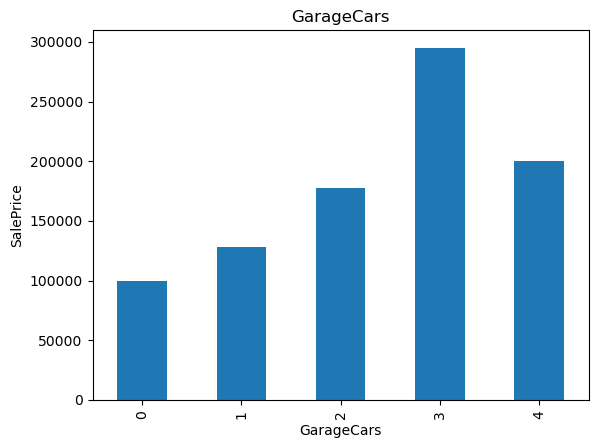

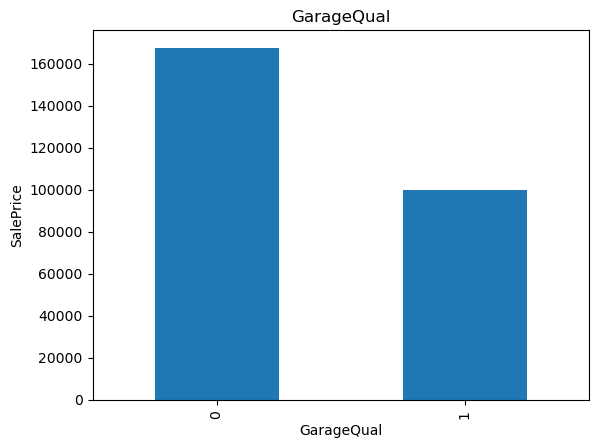

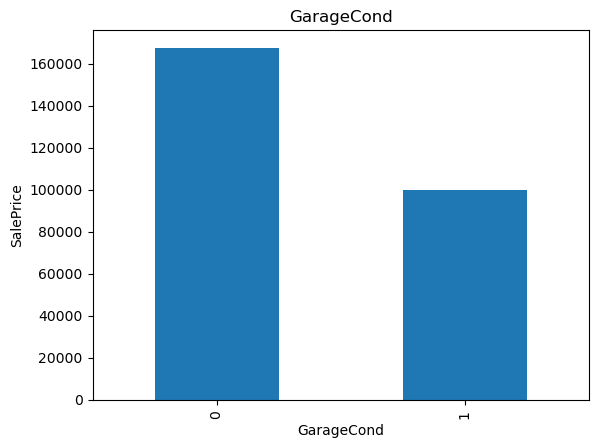

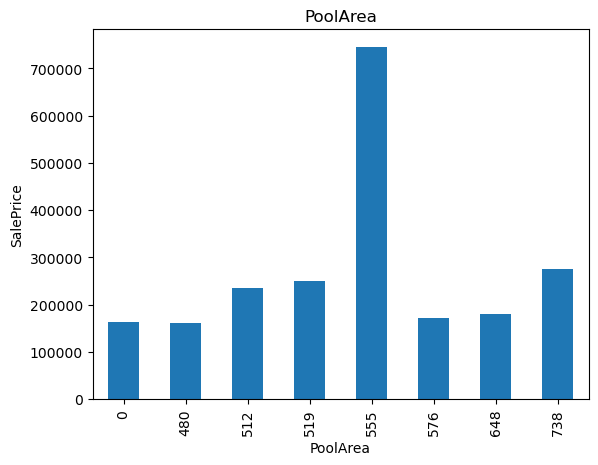

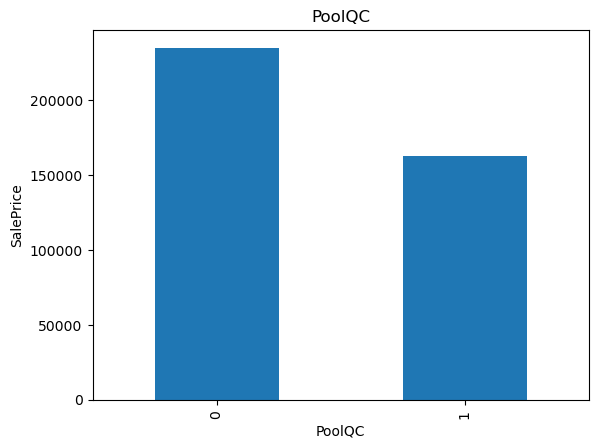

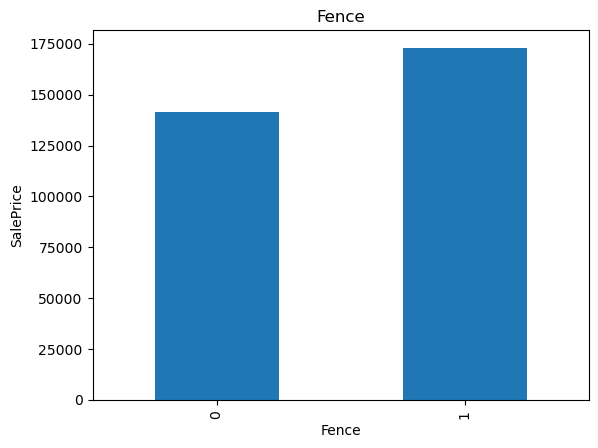

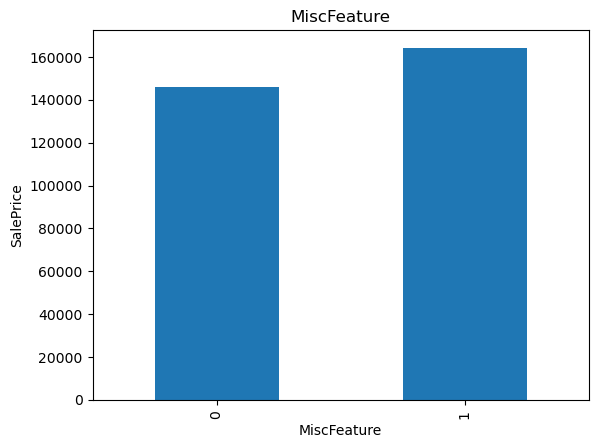

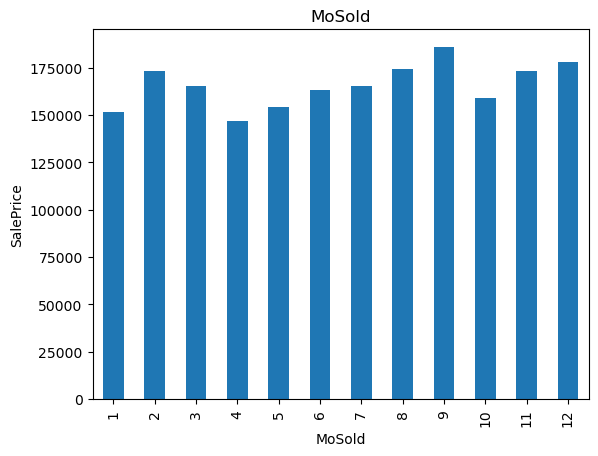

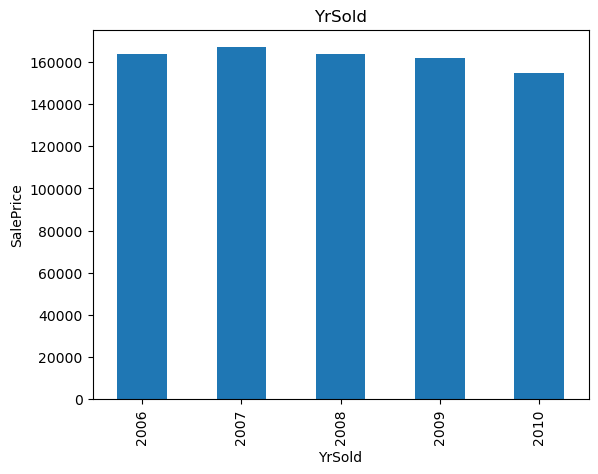

In [20]:
for features in  discrete_features:
    df.groupby(features)['SalePrice'].median().plot.bar()
    plt.title(features)
    plt.xlabel(features)
    plt.ylabel("SalePrice")
    plt.show()

Contineous Variable

In [21]:
contineous_feature=[feature for feature in numerical_feature if feature not in discrete_features + tempo_feature+['Id']]

In [22]:
print(len(contineous_feature))

17


lets see the relationship between the contineous variable and dependent variable
for contineous variable we use histogram

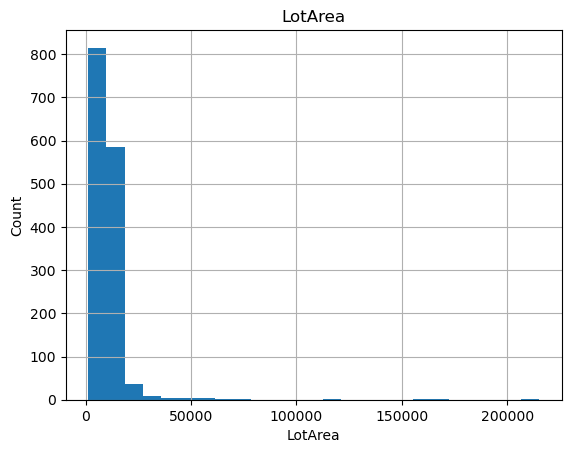

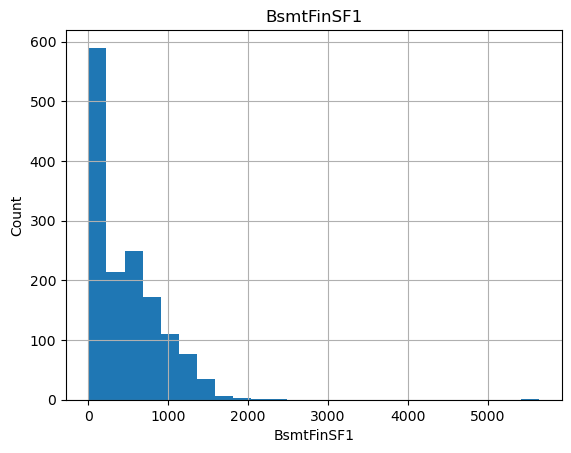

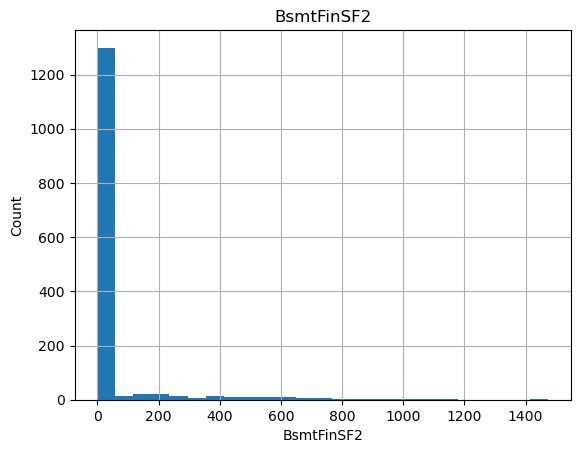

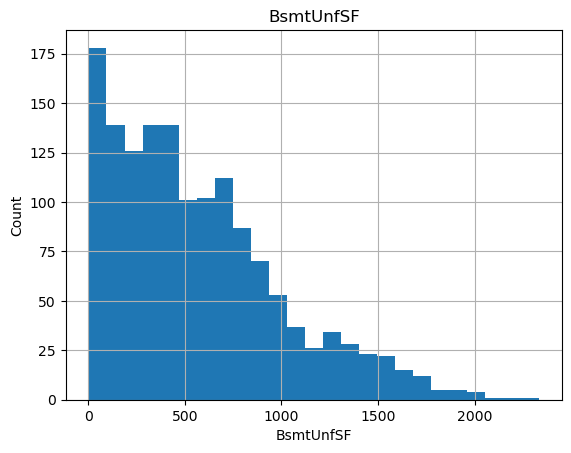

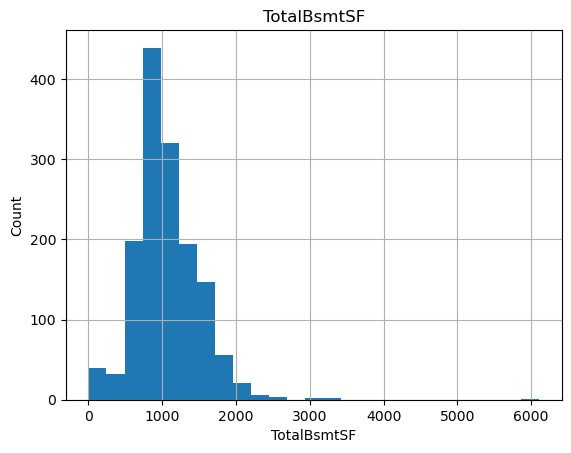

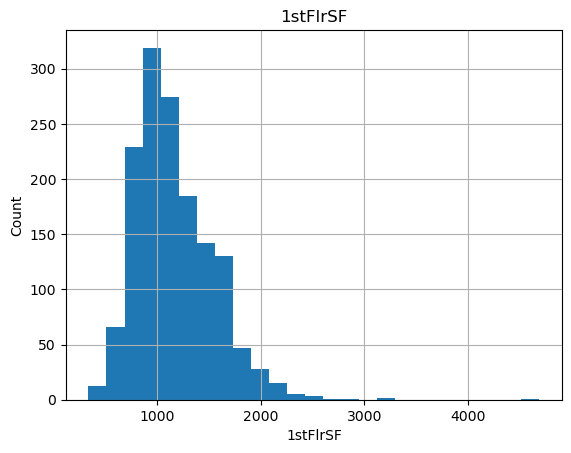

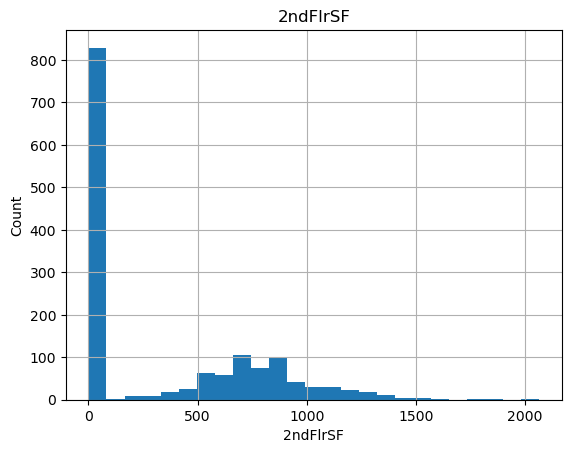

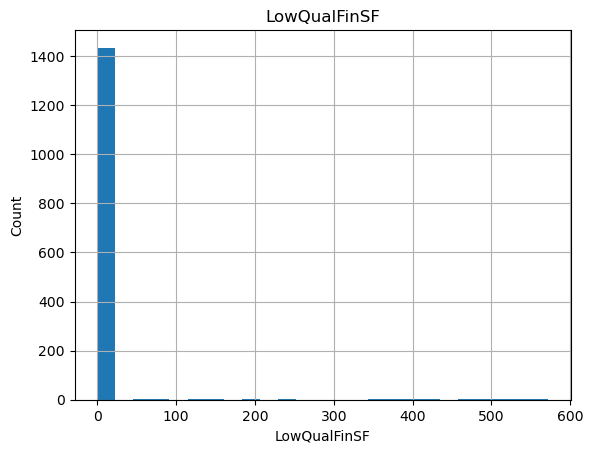

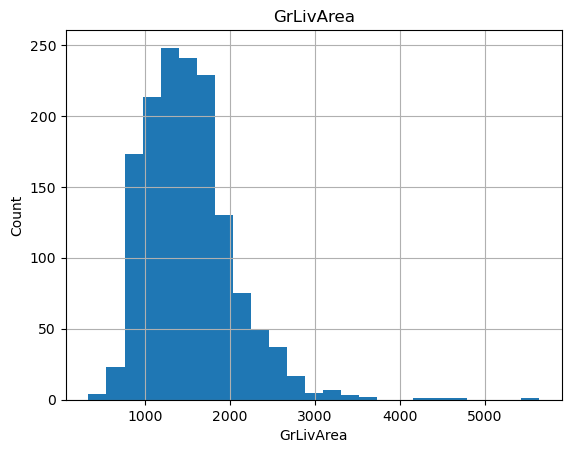

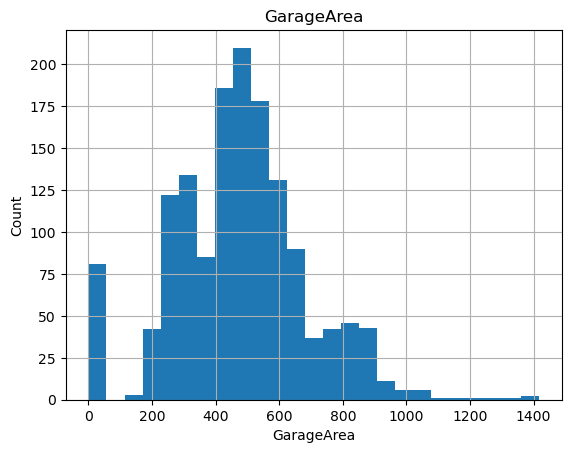

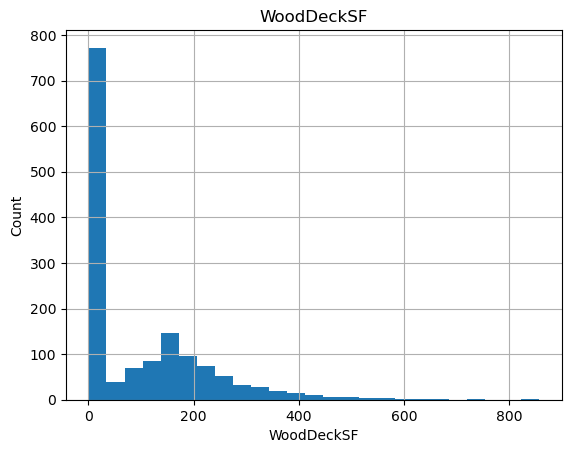

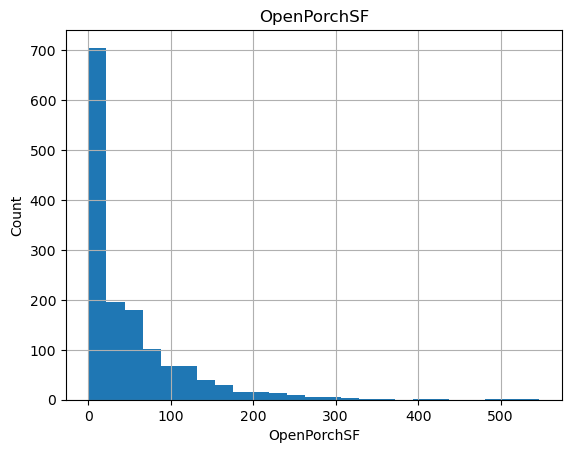

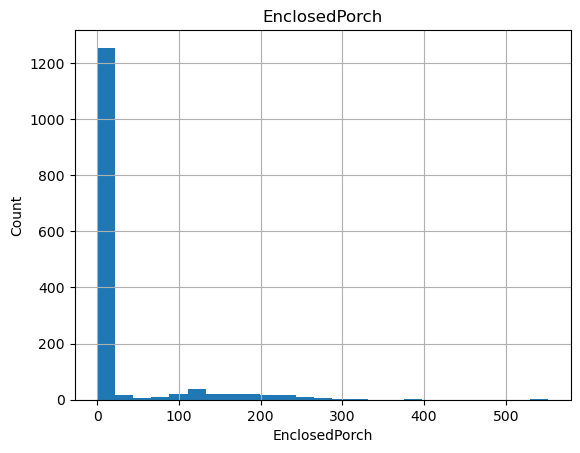

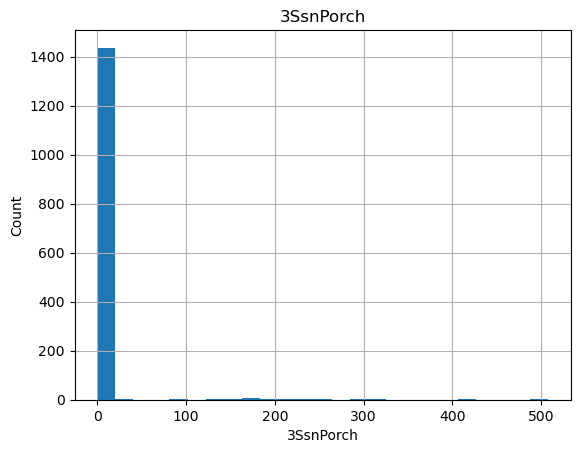

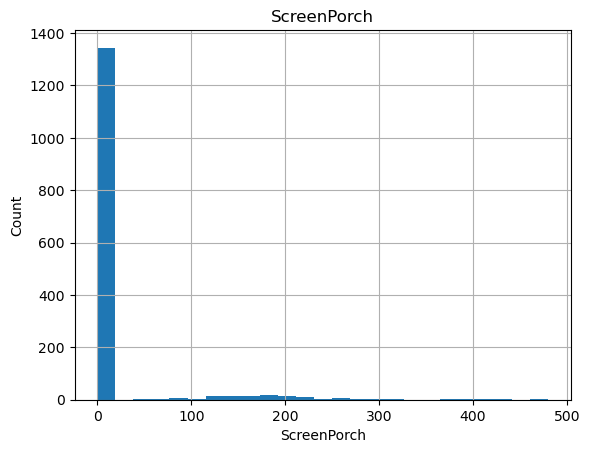

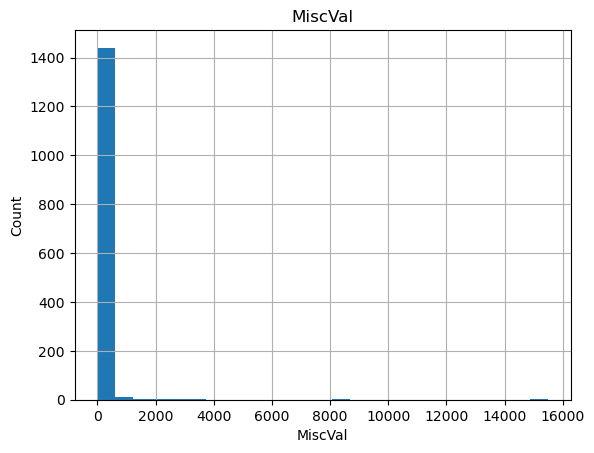

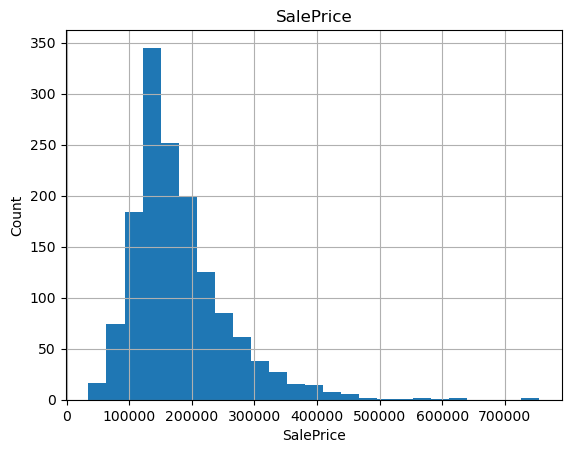

In [23]:
for features in contineous_feature:
    df[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel('Count')
    plt.title(features)
    plt.show()


garare area is normally distributed and other are right skewed ie positively skewed

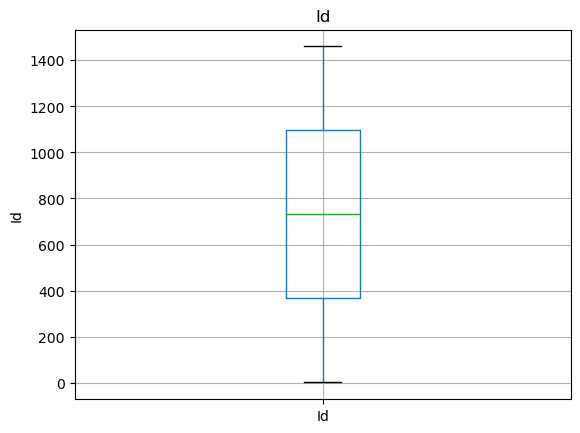

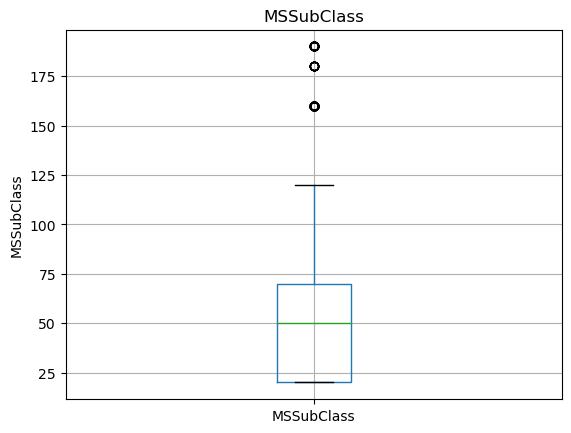

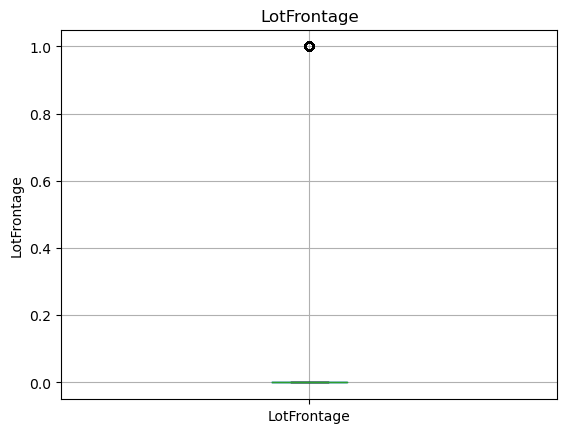

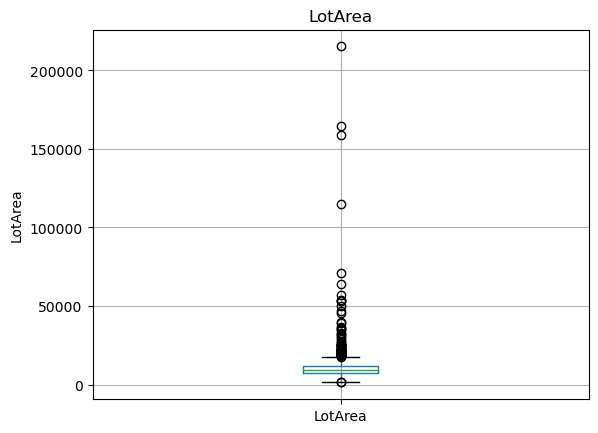

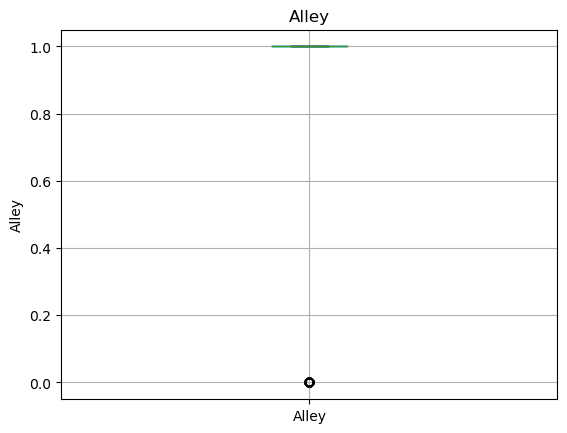

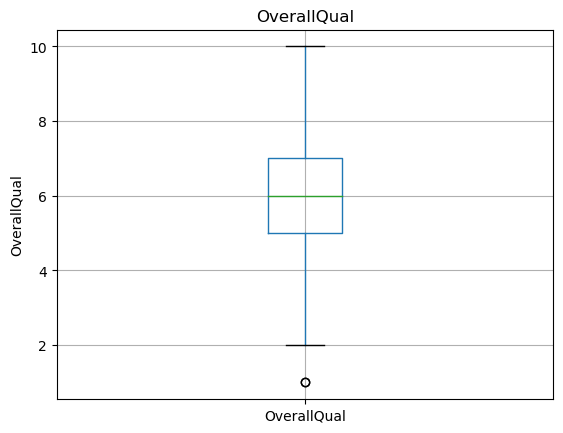

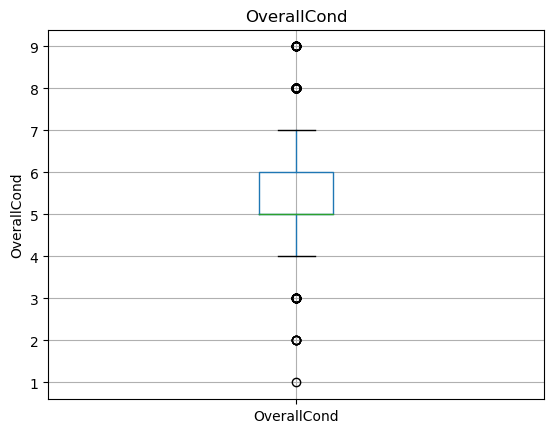

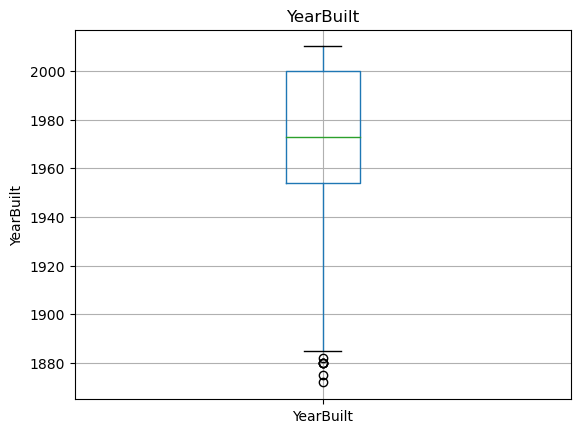

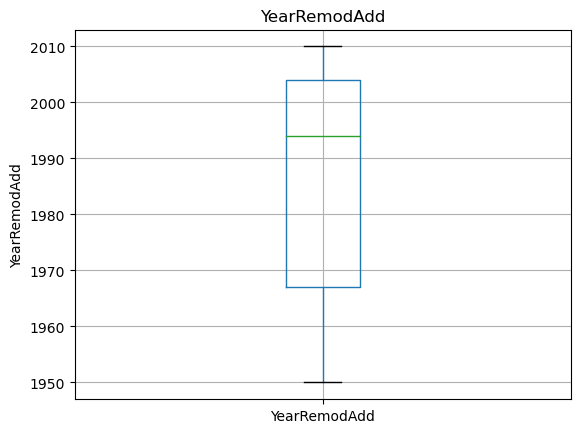

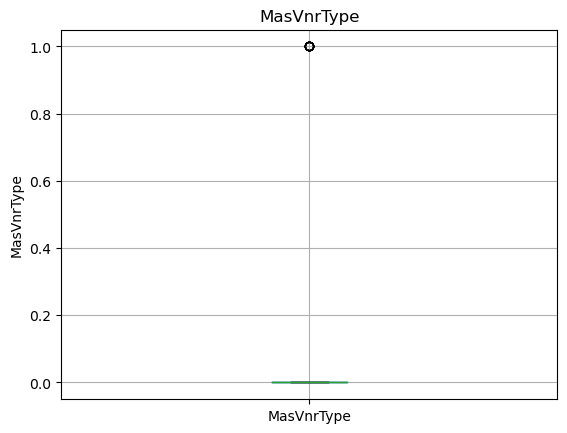

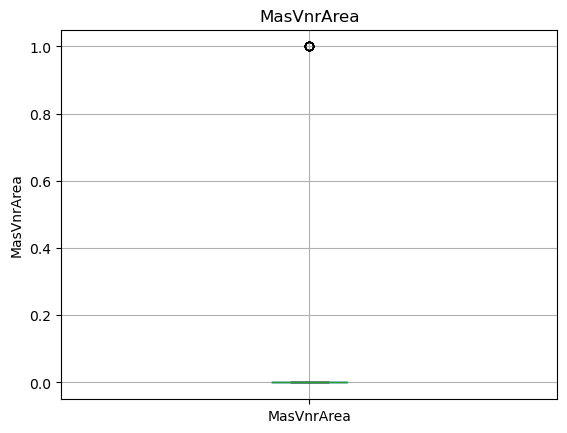

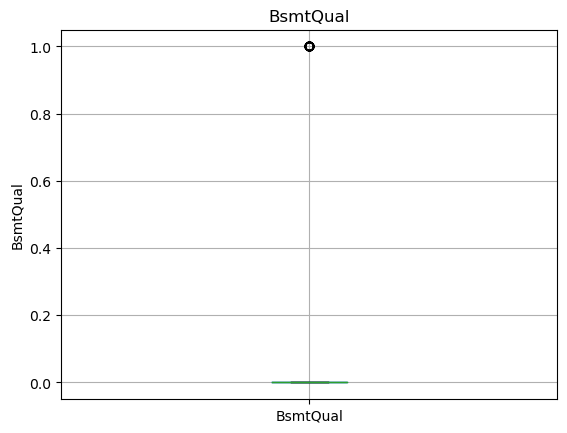

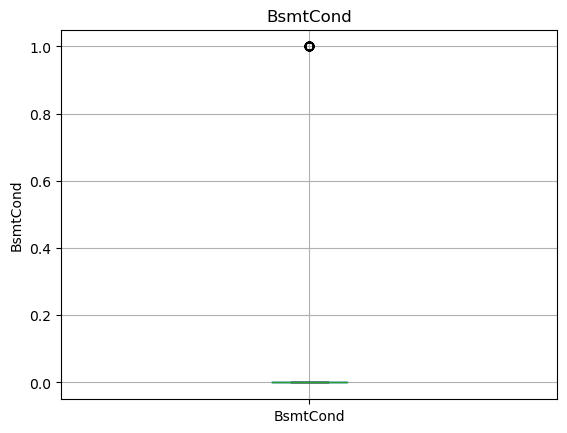

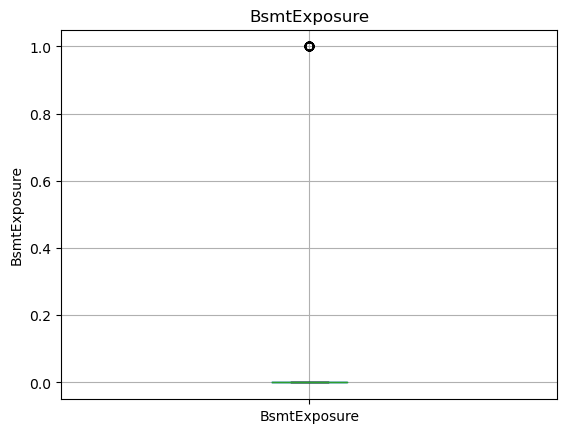

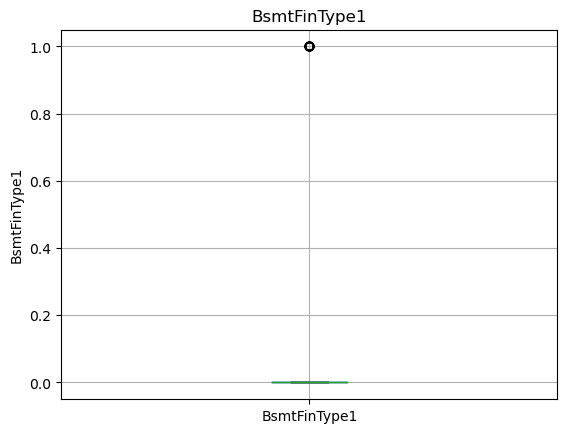

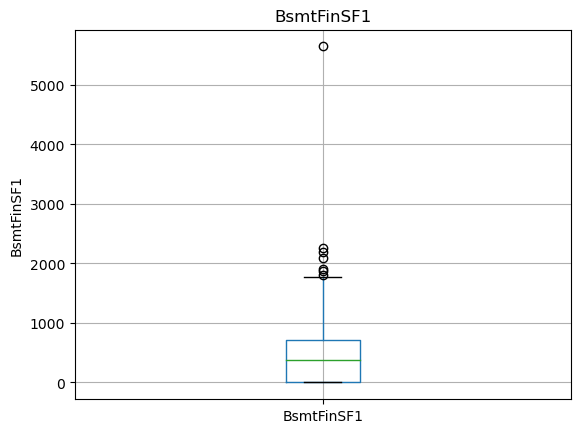

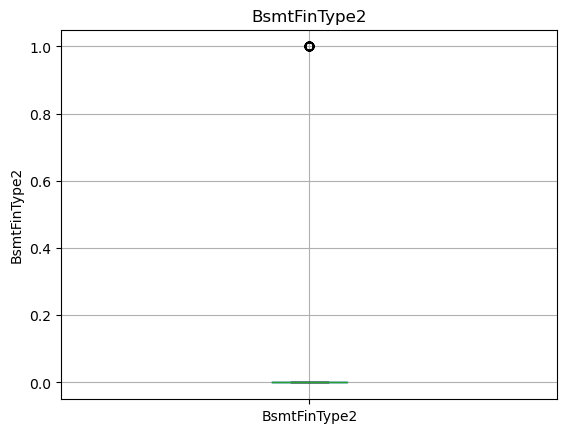

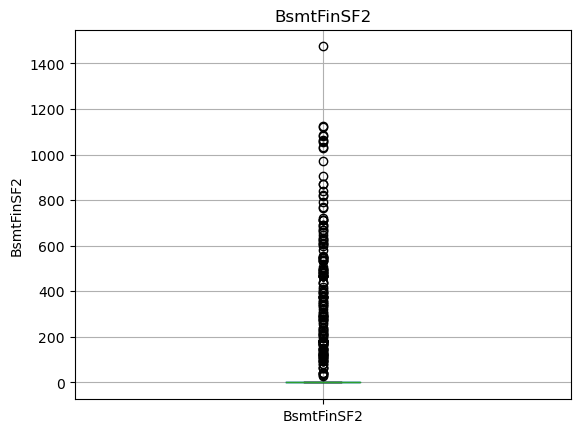

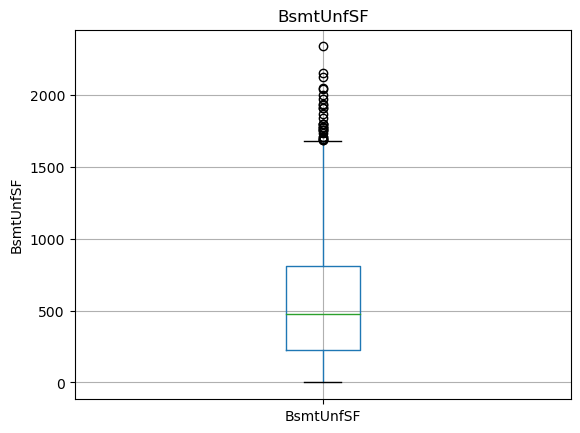

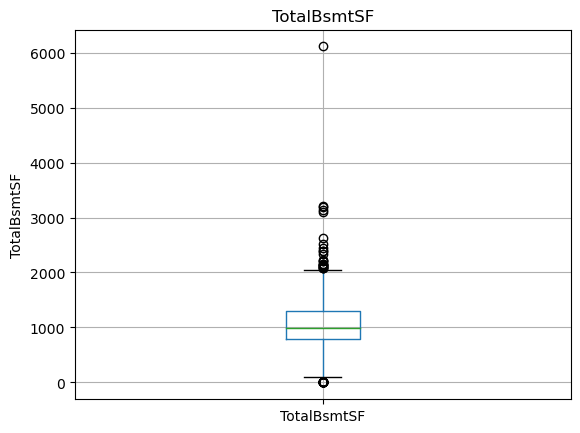

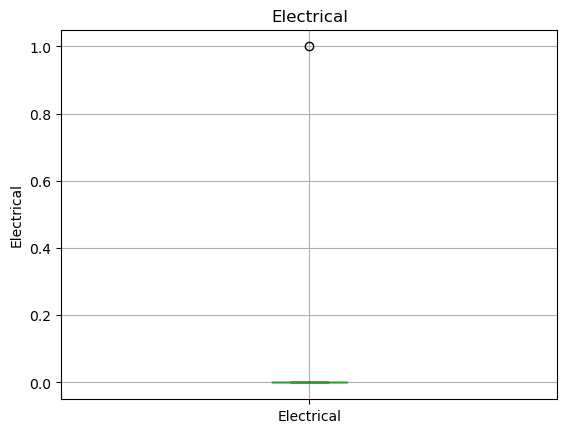

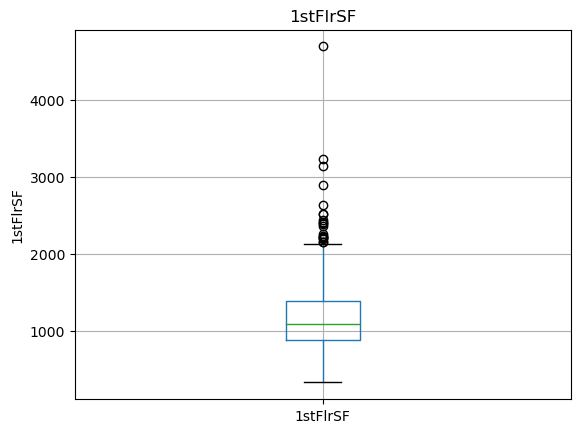

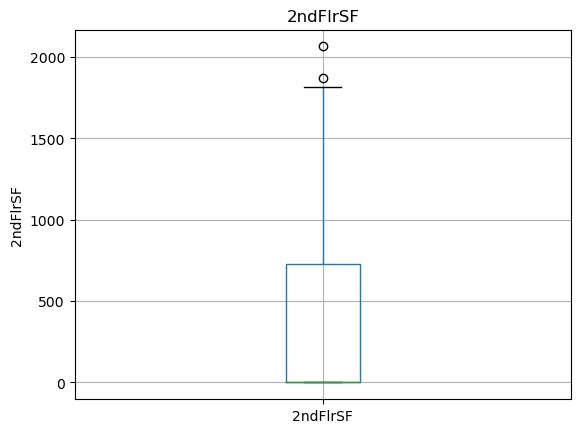

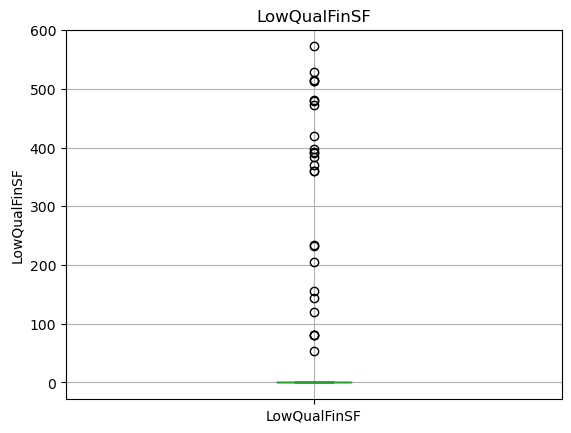

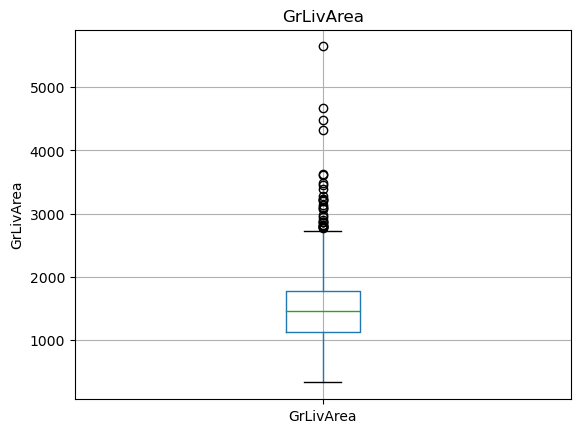

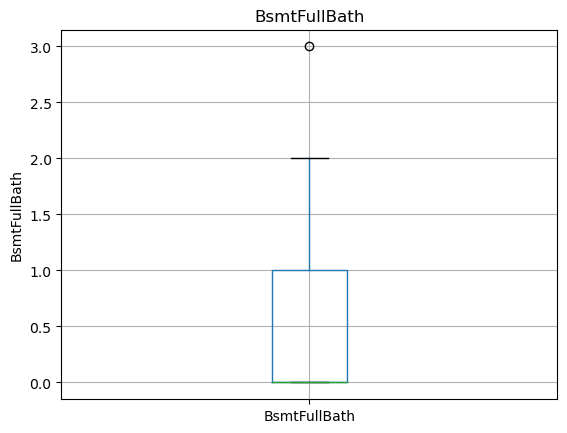

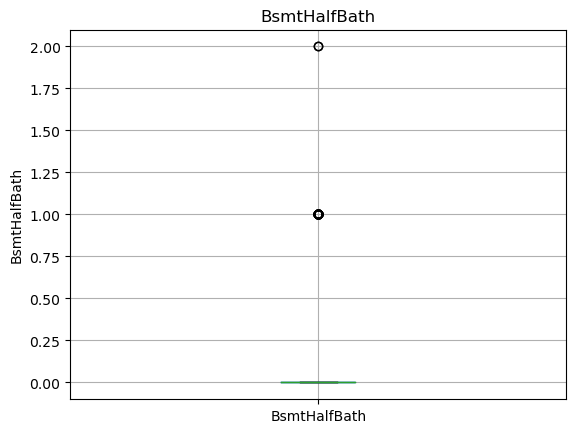

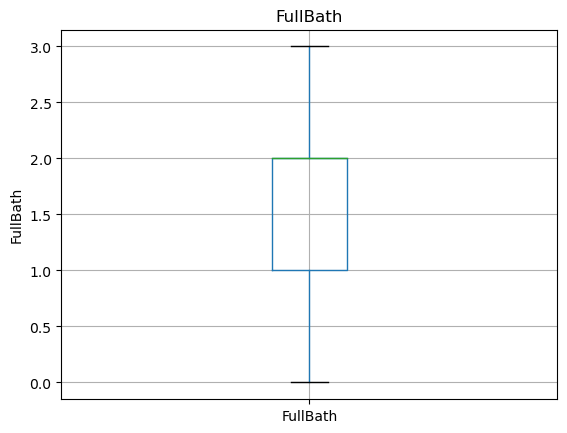

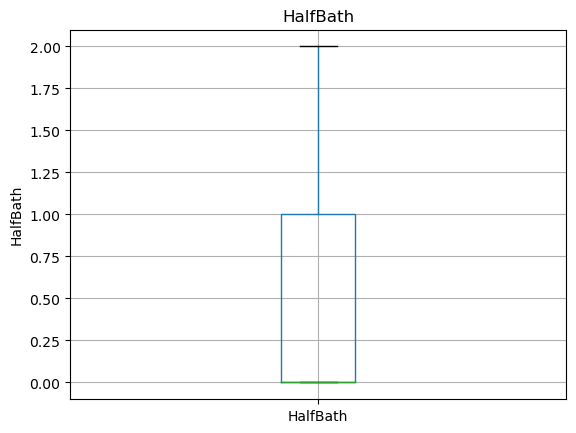

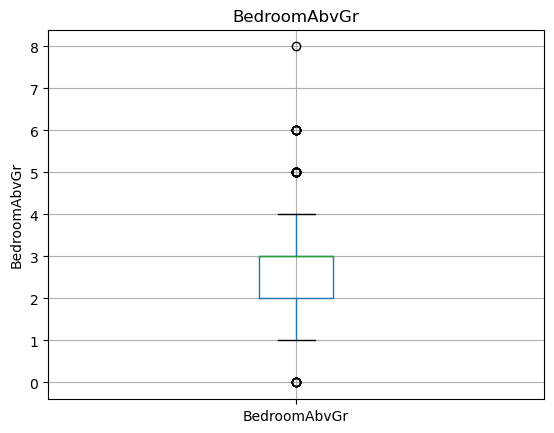

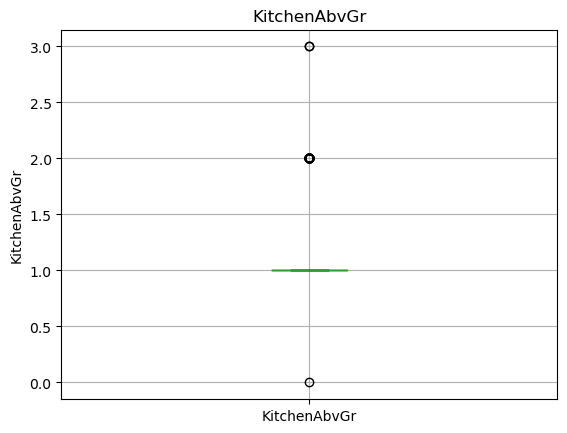

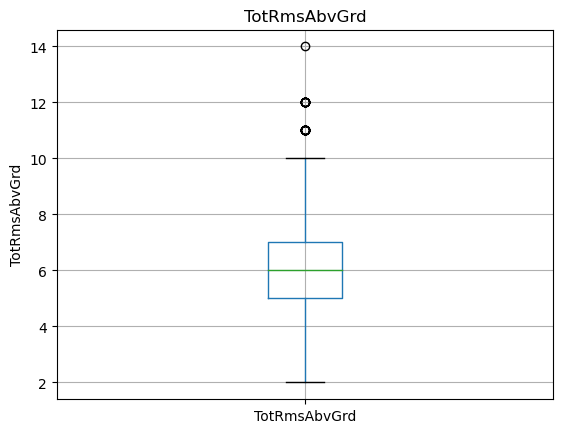

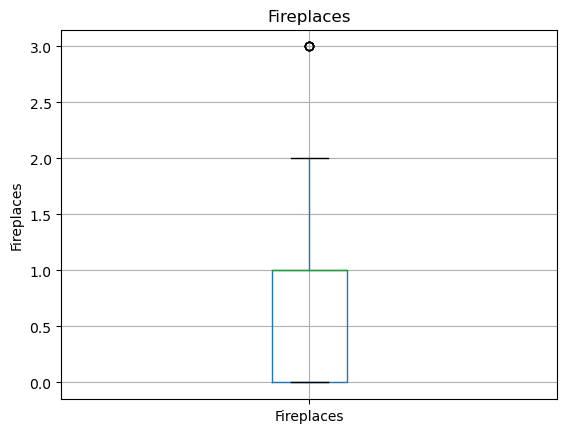

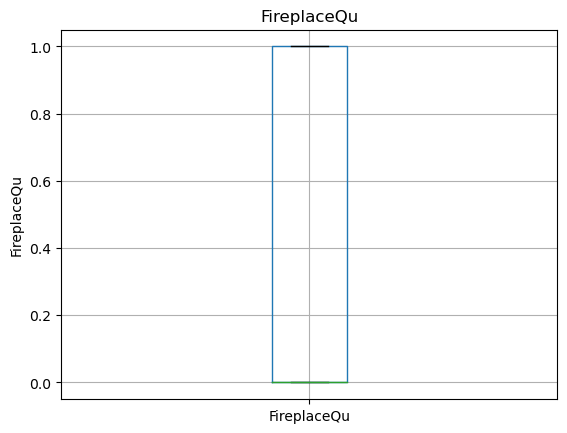

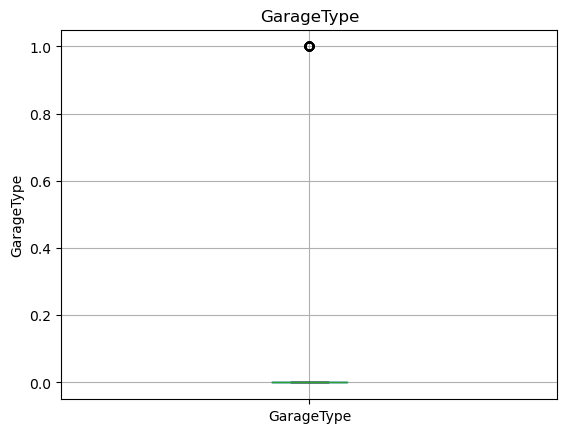

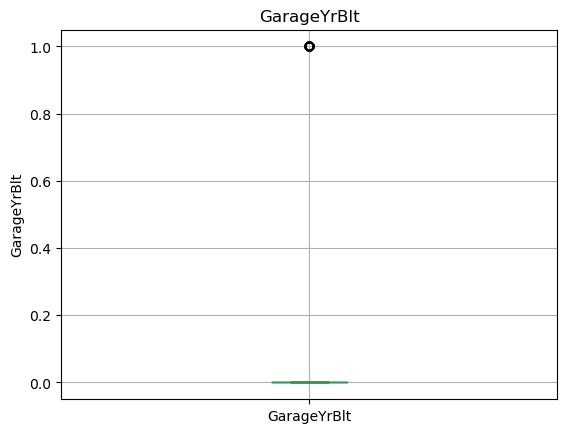

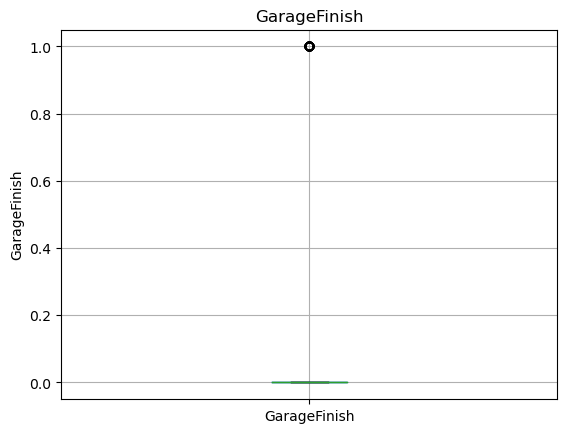

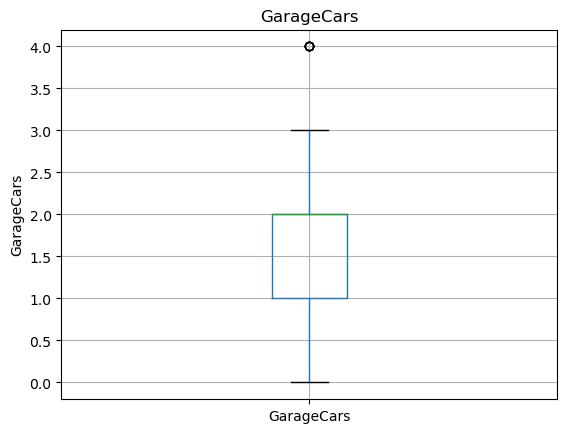

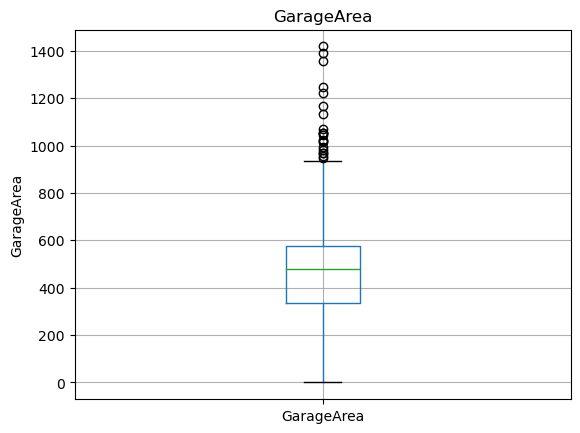

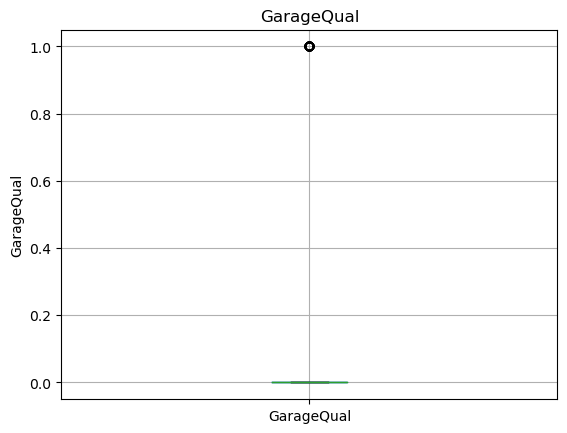

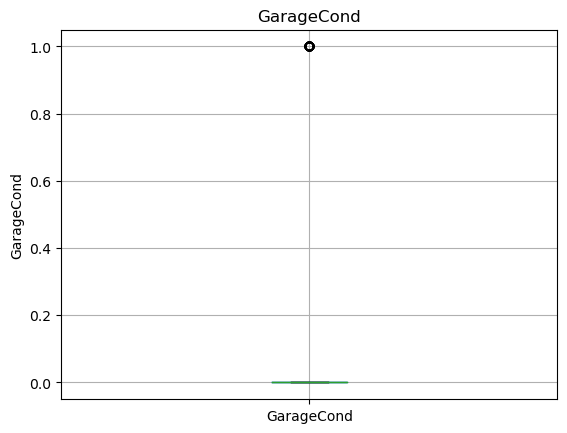

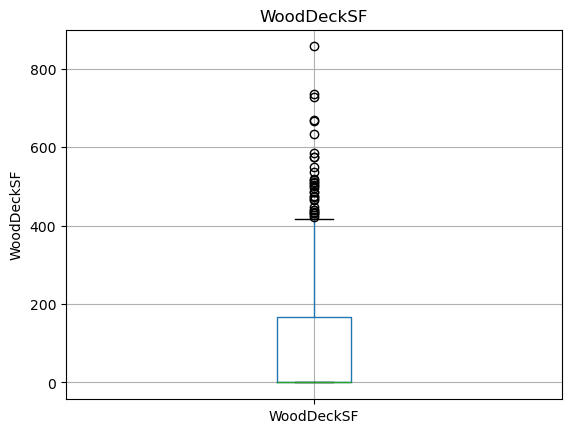

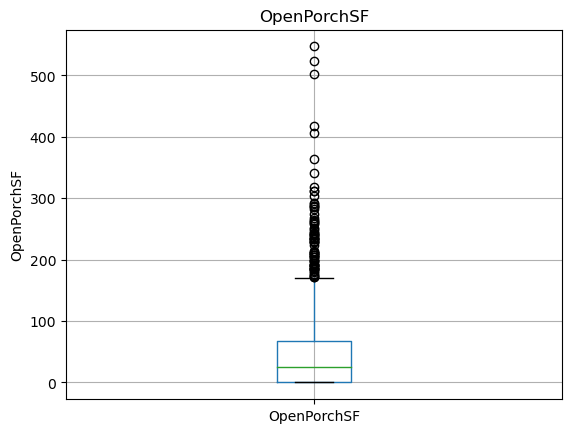

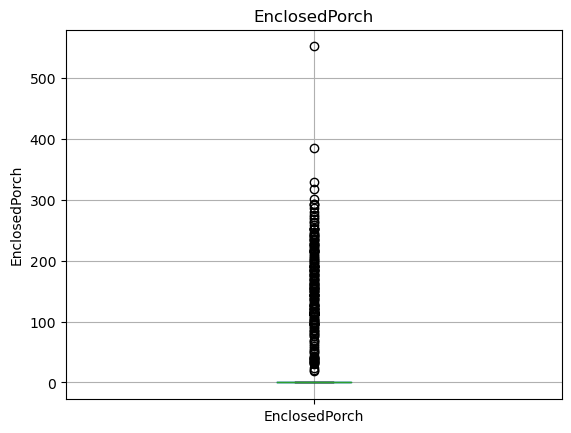

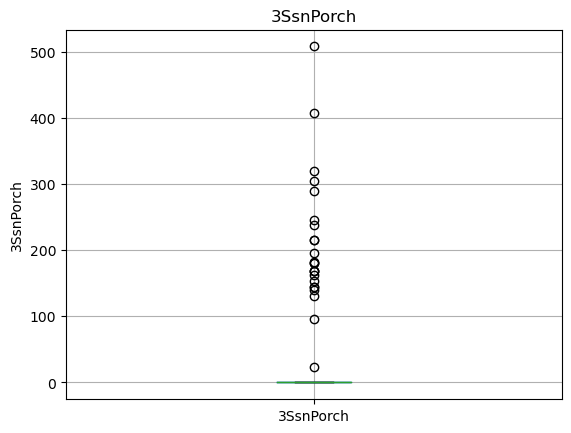

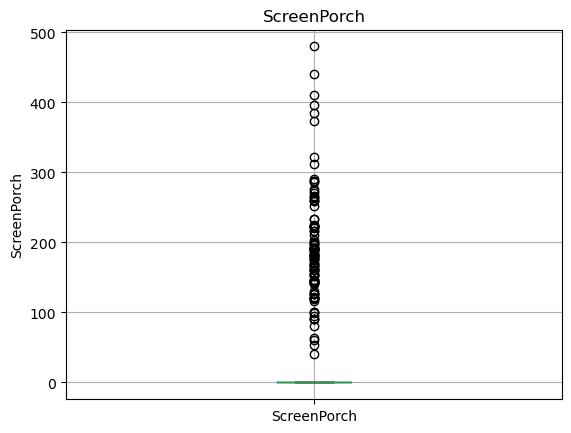

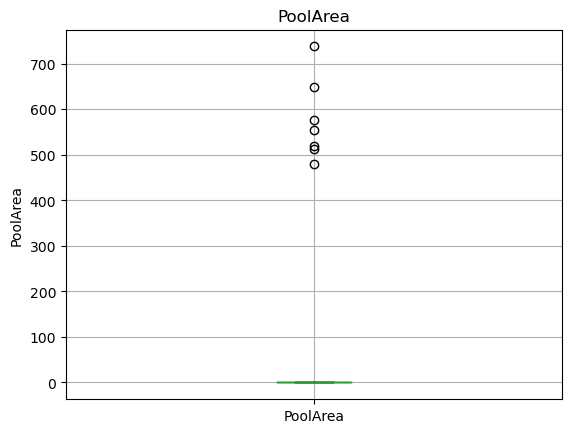

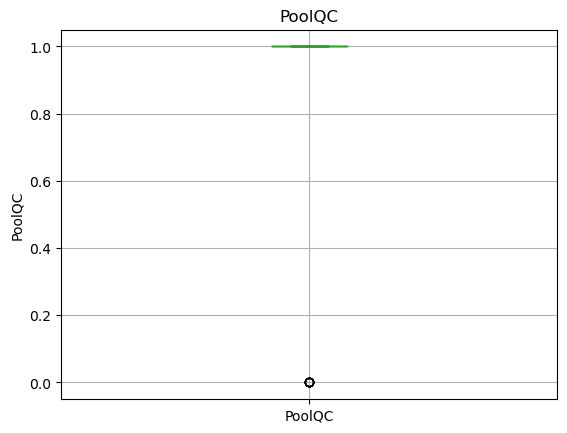

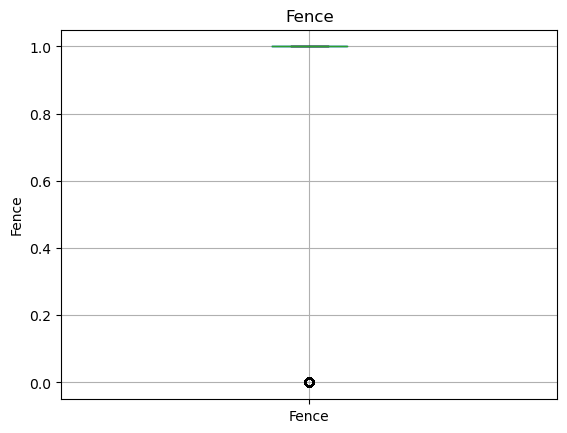

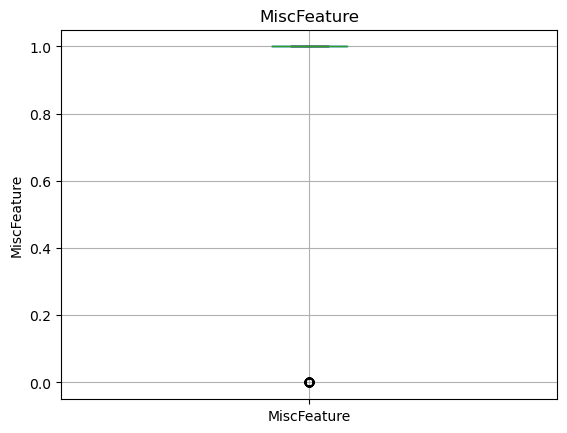

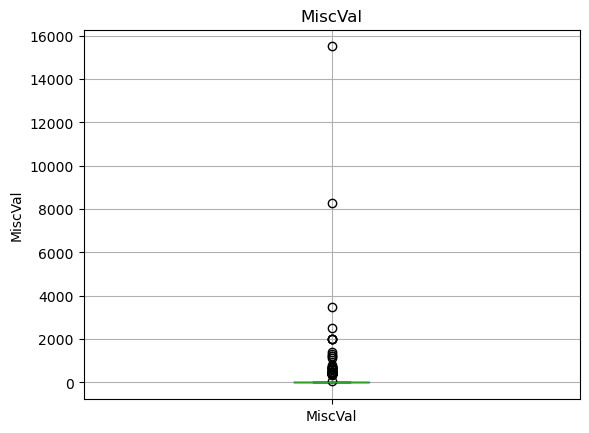

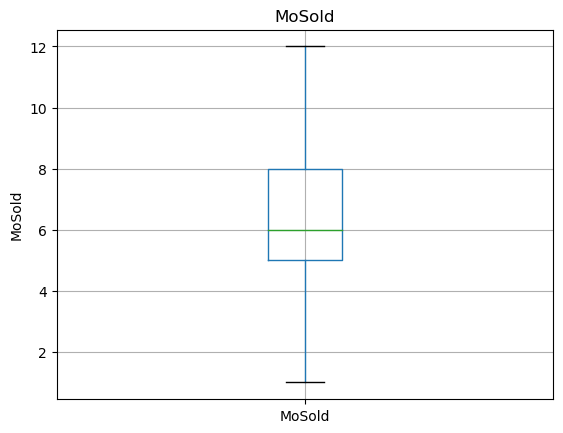

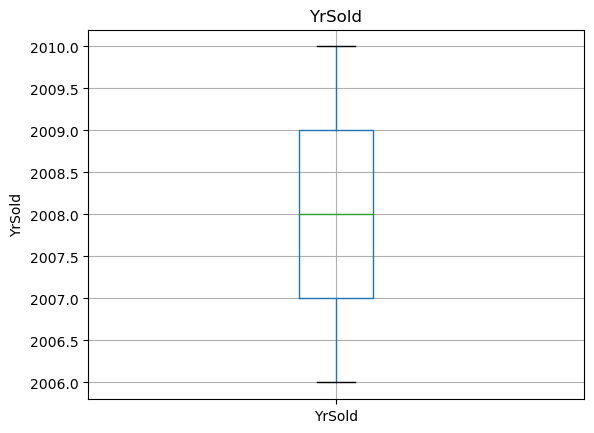

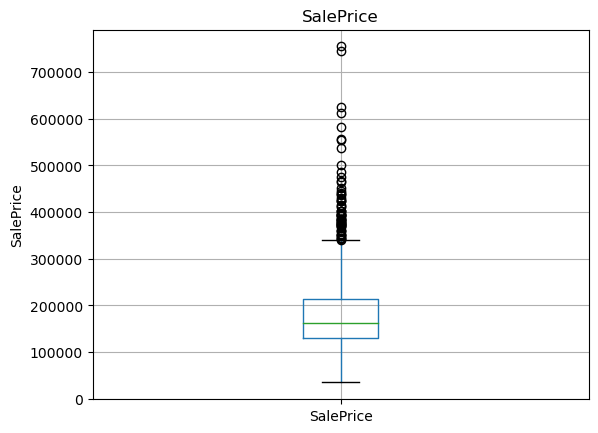

In [24]:
for feature in numerical_feature:
    df.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

from here we can see lot of features has outliers

In [25]:
corr_matrix=df.corr()

In [26]:
import seaborn as sns

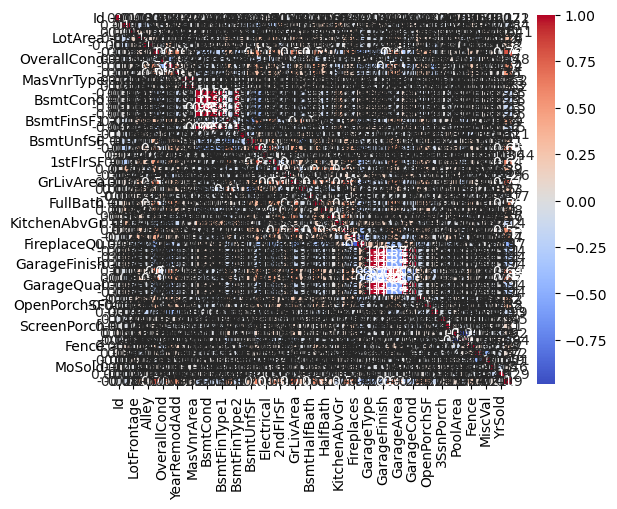

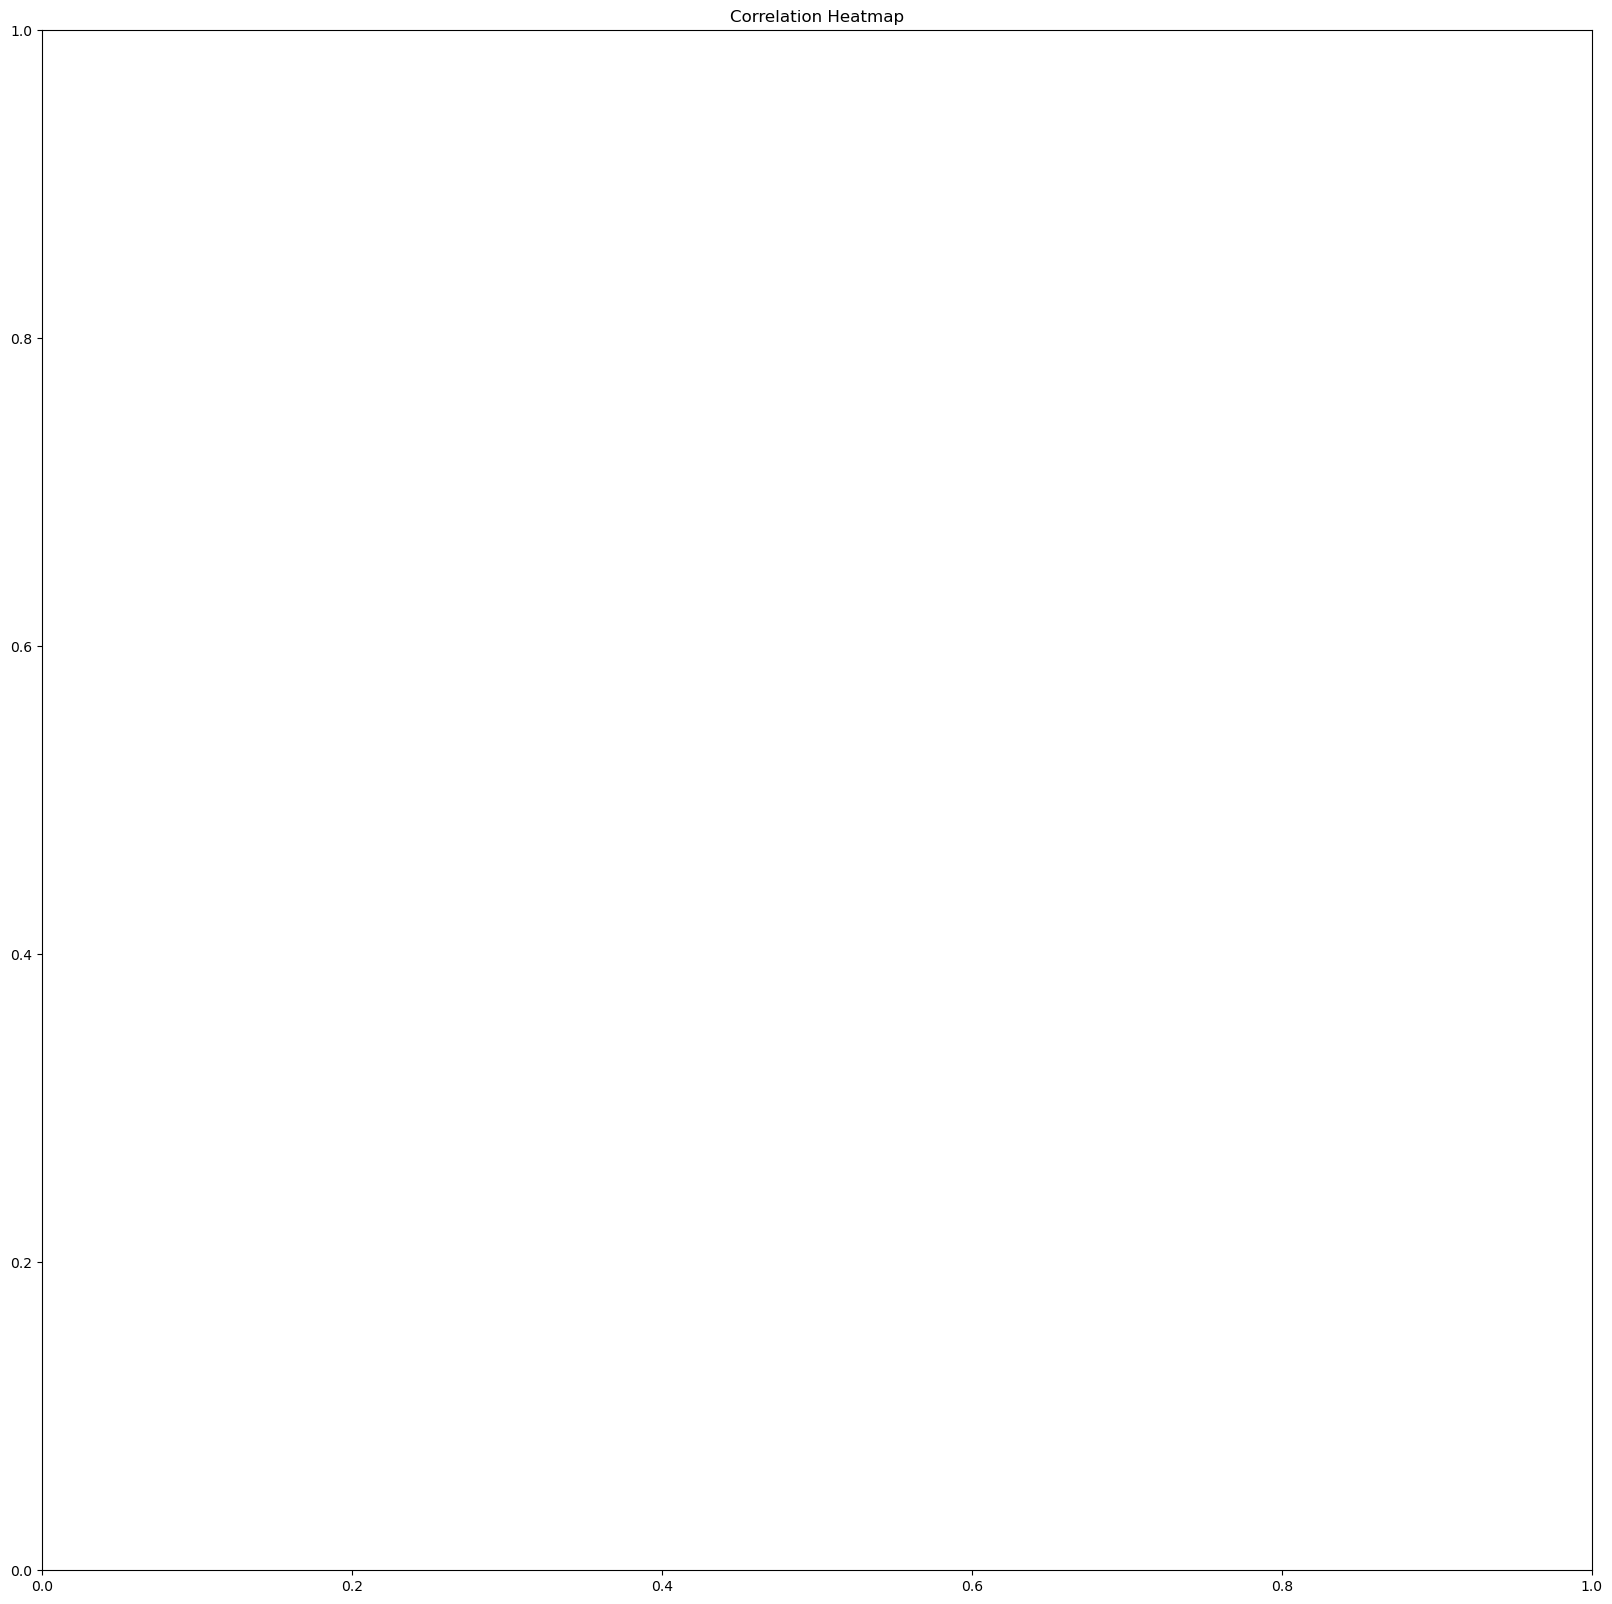

In [27]:
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.figure(figsize=(20, 20))
plt.title('Correlation Heatmap')
plt.show()

In [28]:
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

In [29]:
print(len(categorical_feature))

27


In [30]:
df[categorical_feature]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Ex,Y,TA,Typ,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,CBlock,GasA,TA,Y,TA,Min1,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Stone,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,CBlock,GasA,Gd,Y,Gd,Typ,Y,WD,Normal


Relationship between categorical variable and dependent variable

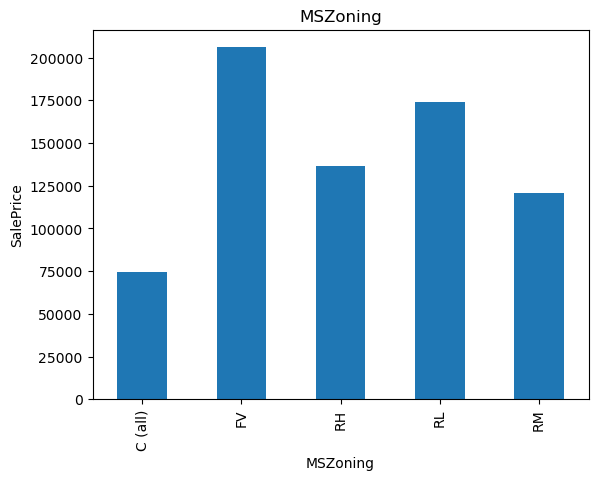

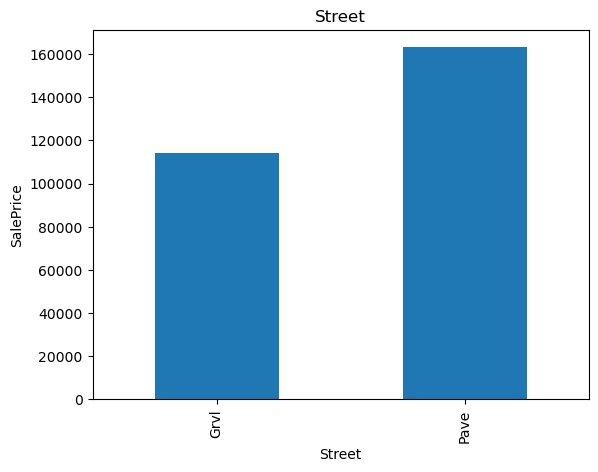

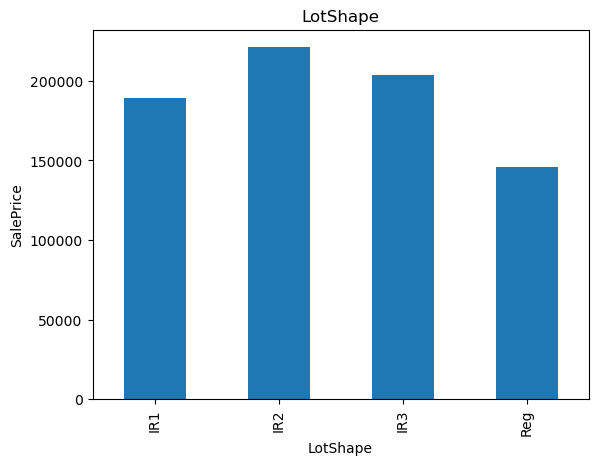

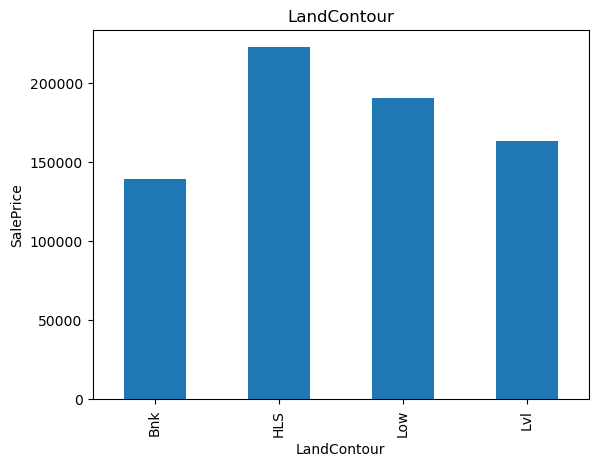

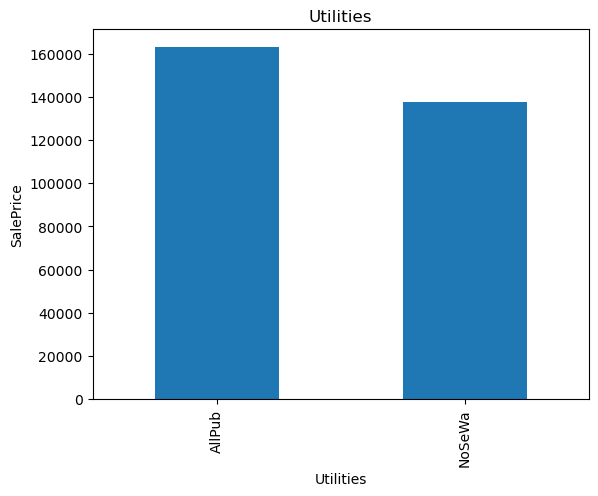

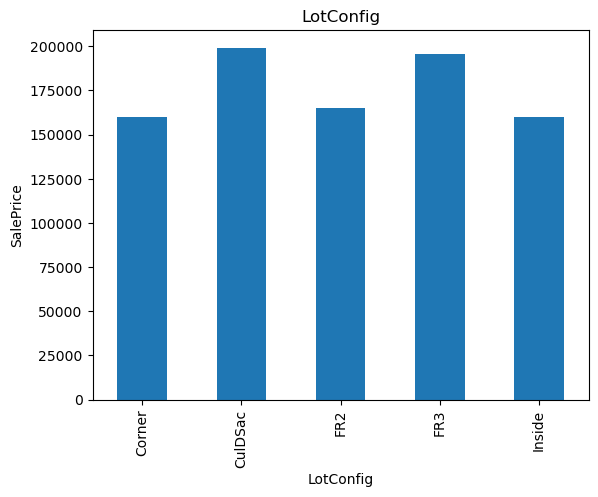

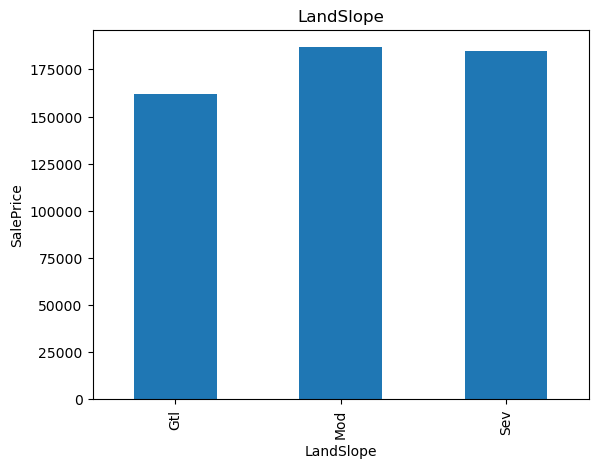

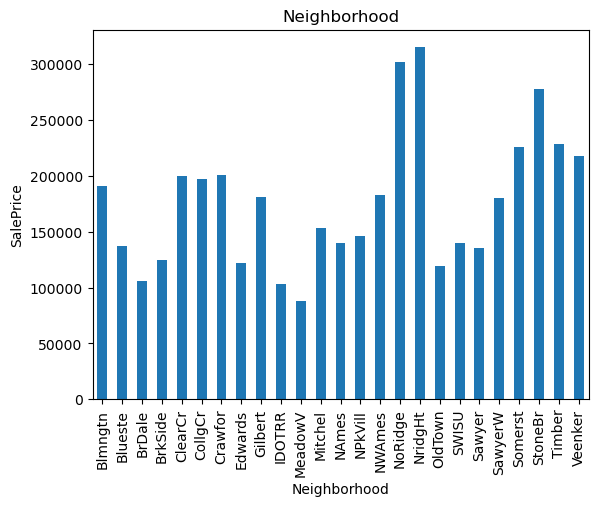

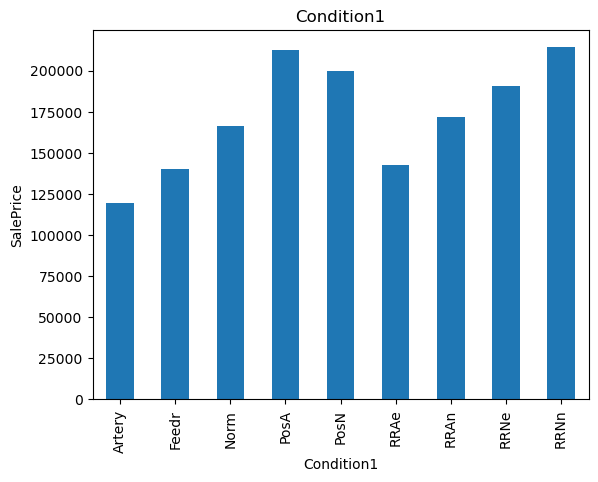

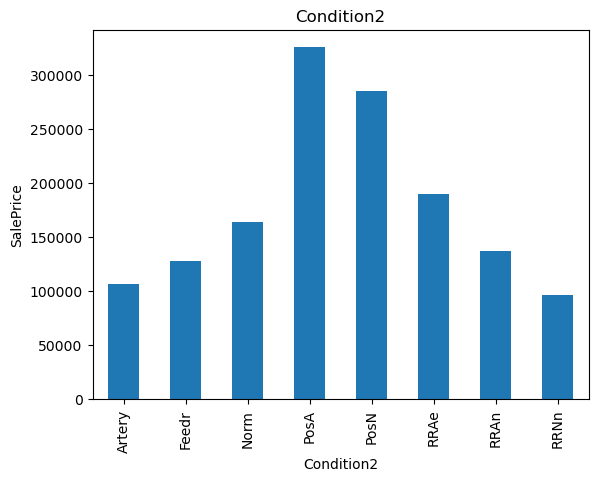

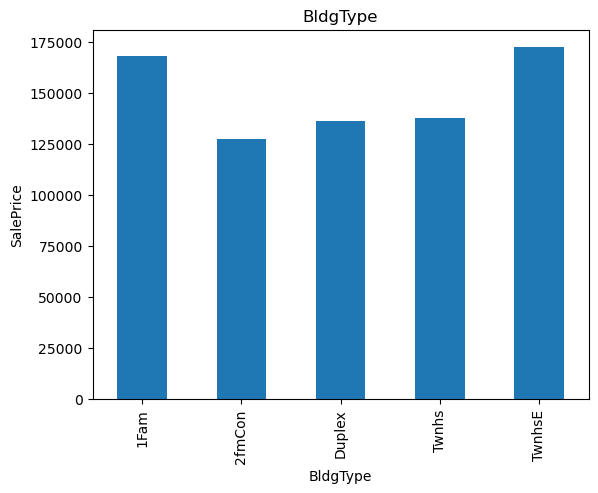

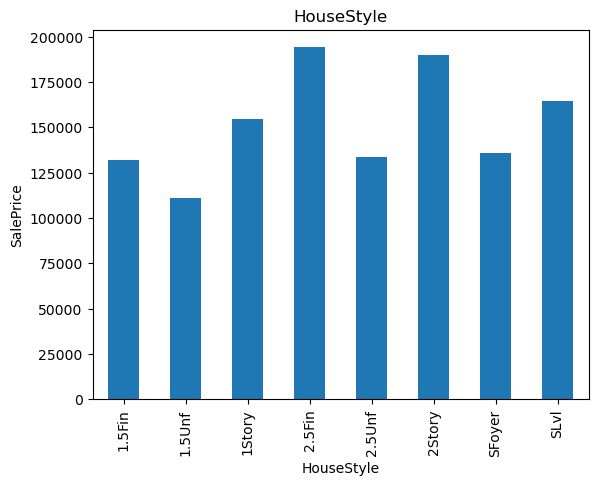

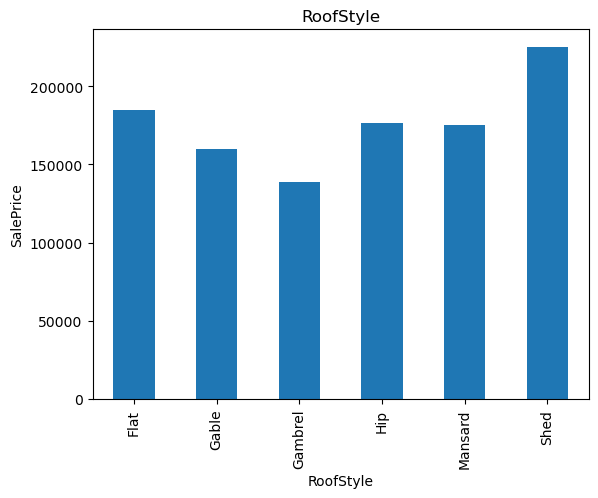

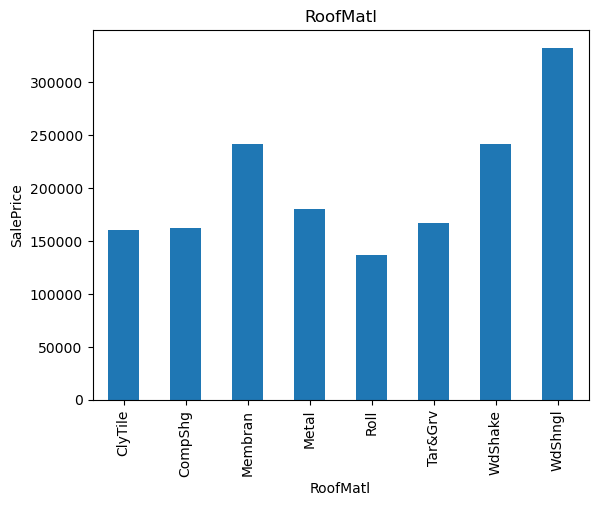

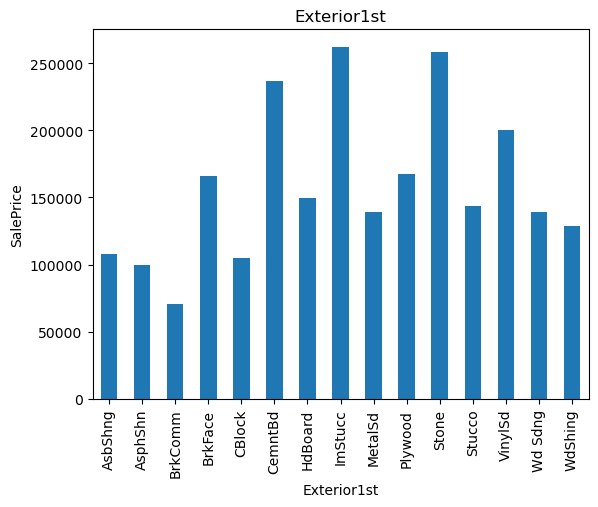

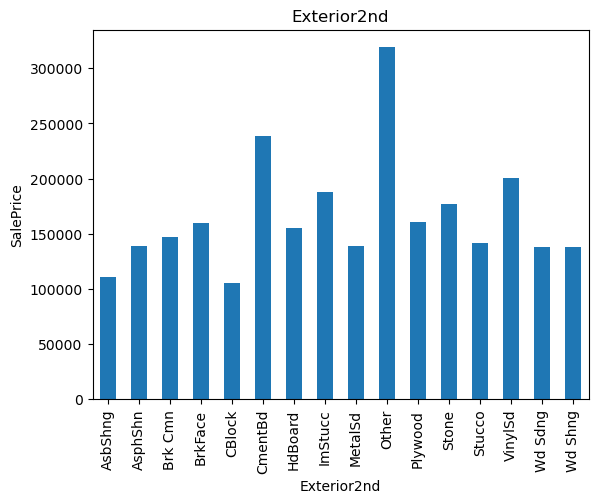

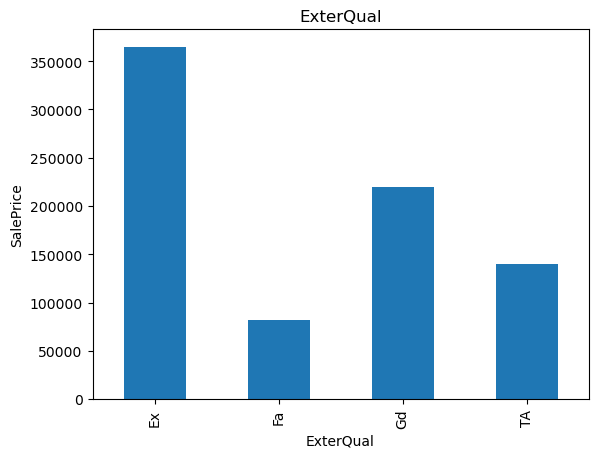

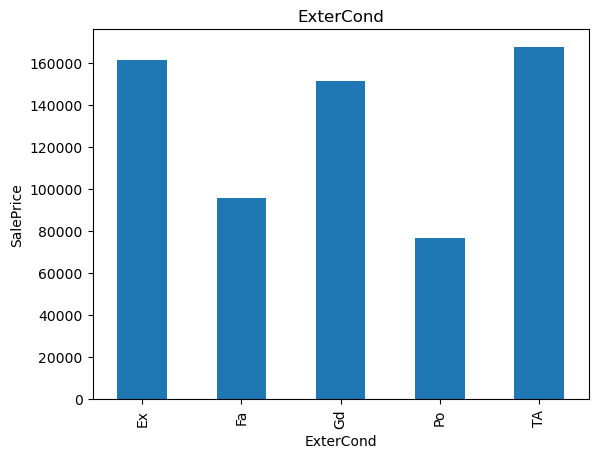

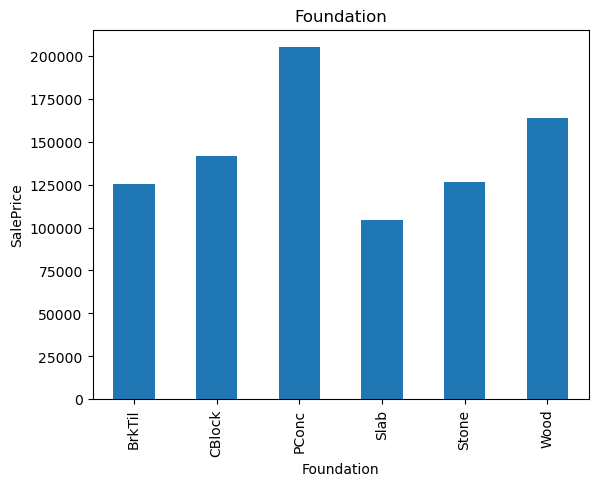

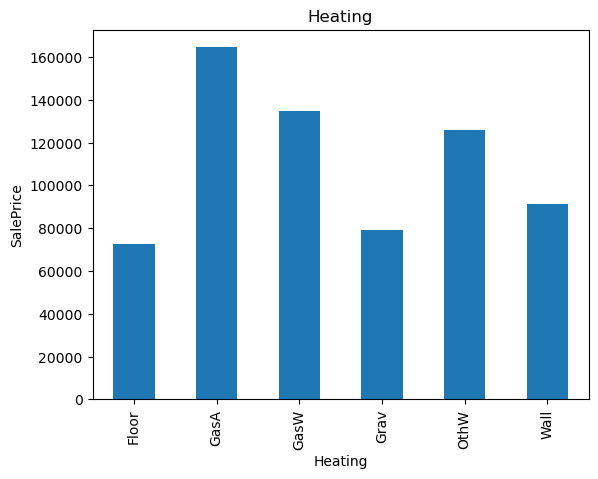

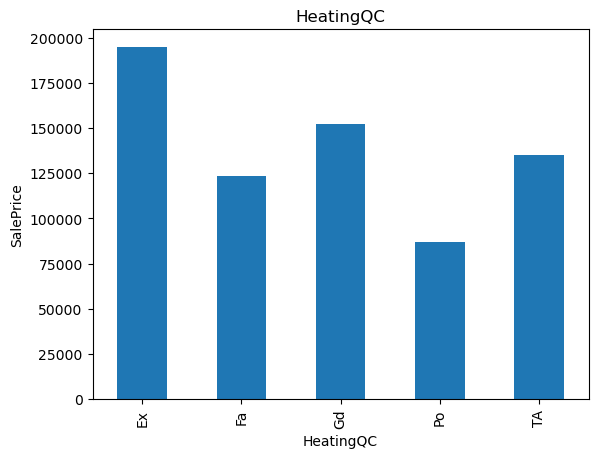

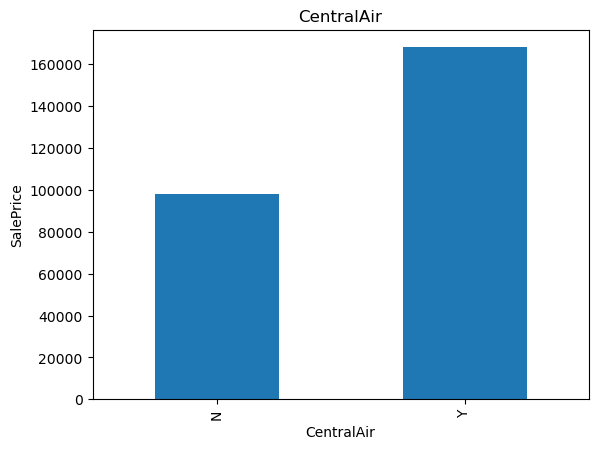

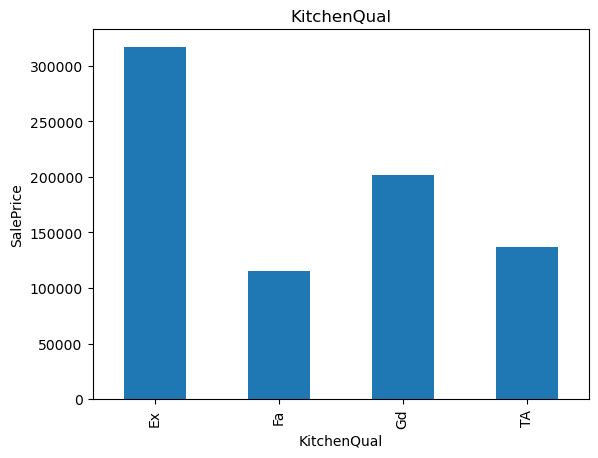

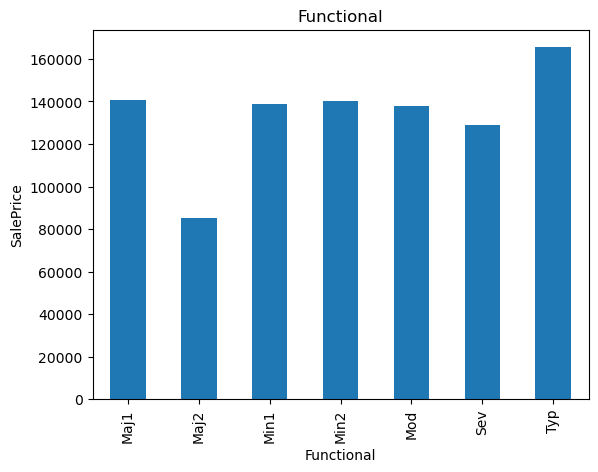

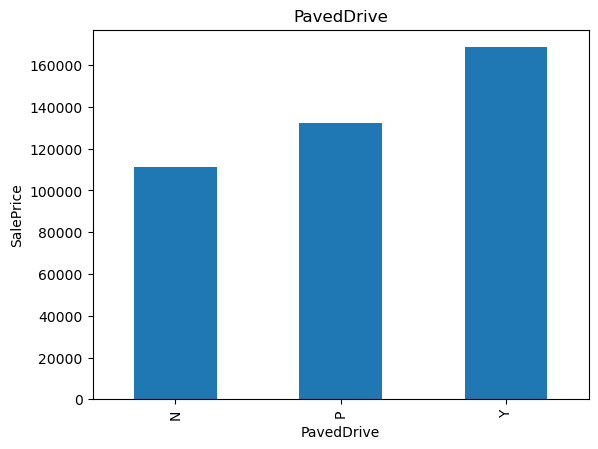

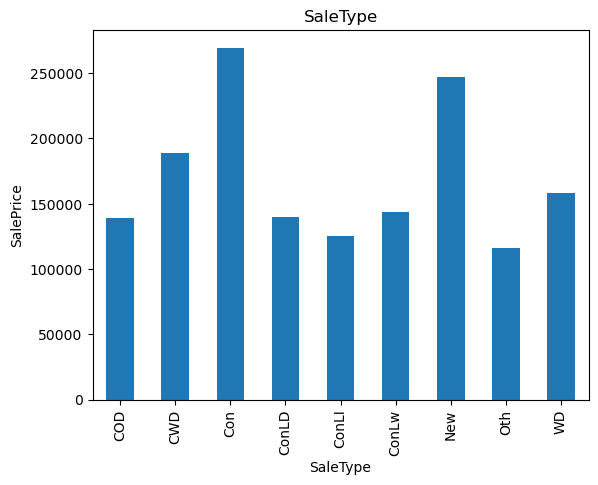

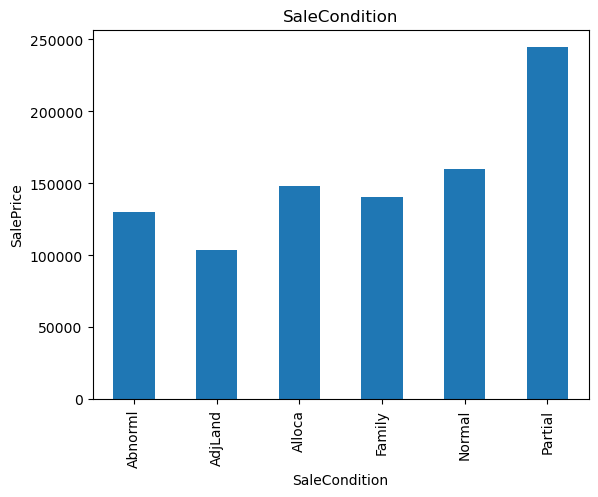

In [31]:
for feature in categorical_feature:
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

###  Feature Engineering Handeling missing values at first 

In [32]:
missing_values=df.isnull().sum()

In [33]:
print(missing_values)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


Here are many missing values so we will handel it one by one

In [34]:
df['LotFrontage']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: LotFrontage, Length: 1460, dtype: int32

In [35]:
def function(df,variable):
    mediann=df[variable].median()
    df[variable+'_median']=df[variable].fillna(mediann)

In [36]:
for features in ['LotFrontage','MasVnrArea']:
    function(df,features)

In [37]:
df=df.drop(['LotFrontage','MasVnrArea'],axis=1)

In [38]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_median,MasVnrArea_median
0,1,60,RL,8450,Pave,1,Reg,Lvl,AllPub,Inside,...,1,1,0,2,2008,WD,Normal,208500,0,0
1,2,20,RL,9600,Pave,1,Reg,Lvl,AllPub,FR2,...,1,1,0,5,2007,WD,Normal,181500,0,0
2,3,60,RL,11250,Pave,1,IR1,Lvl,AllPub,Inside,...,1,1,0,9,2008,WD,Normal,223500,0,0
3,4,70,RL,9550,Pave,1,IR1,Lvl,AllPub,Corner,...,1,1,0,2,2006,WD,Abnorml,140000,0,0
4,5,60,RL,14260,Pave,1,IR1,Lvl,AllPub,FR2,...,1,1,0,12,2008,WD,Normal,250000,0,0


In [39]:
df['LotFrontage_median'].isnull().sum()

0

In [40]:
df['Alley'].unique()

array([1, 0])

In [41]:
#Here we will replace nan by missing variable

In [42]:
def functionn(df,variable):
    df[variable+'_Missing']=np.where(df[variable].isnull(),'missing',df[variable])

In [43]:
for features in ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']:
    functionn(df,features)

In [44]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType,SaleCondition,SalePrice,LotFrontage_median,MasVnrArea_median,Alley_Missing,FireplaceQu_Missing,PoolQC_Missing,Fence_Missing,MiscFeature_Missing
0,1,60,RL,8450,Pave,1,Reg,Lvl,AllPub,Inside,...,WD,Normal,208500,0,0,1,1,1,1,1
1,2,20,RL,9600,Pave,1,Reg,Lvl,AllPub,FR2,...,WD,Normal,181500,0,0,1,0,1,1,1
2,3,60,RL,11250,Pave,1,IR1,Lvl,AllPub,Inside,...,WD,Normal,223500,0,0,1,0,1,1,1
3,4,70,RL,9550,Pave,1,IR1,Lvl,AllPub,Corner,...,WD,Abnorml,140000,0,0,1,0,1,1,1
4,5,60,RL,14260,Pave,1,IR1,Lvl,AllPub,FR2,...,WD,Normal,250000,0,0,1,0,1,1,1


In [45]:
df=df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [46]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType,SaleCondition,SalePrice,LotFrontage_median,MasVnrArea_median,Alley_Missing,FireplaceQu_Missing,PoolQC_Missing,Fence_Missing,MiscFeature_Missing
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Normal,208500,0,0,1,1,1,1,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,WD,Normal,181500,0,0,1,0,1,1,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,WD,Normal,223500,0,0,1,0,1,1,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,WD,Abnorml,140000,0,0,1,0,1,1,1
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,WD,Normal,250000,0,0,1,0,1,1,1


In [47]:
most_freq_categor=df['BsmtQual'].mode()[0]

In [48]:
def functionnn (df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [49]:
for features in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical',
                 'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','MasVnrType']:
    functionnn(df,features)

In [50]:
df.head()


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType,SaleCondition,SalePrice,LotFrontage_median,MasVnrArea_median,Alley_Missing,FireplaceQu_Missing,PoolQC_Missing,Fence_Missing,MiscFeature_Missing
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Normal,208500,0,0,1,1,1,1,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,WD,Normal,181500,0,0,1,0,1,1,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,WD,Normal,223500,0,0,1,0,1,1,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,WD,Abnorml,140000,0,0,1,0,1,1,1
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,WD,Normal,250000,0,0,1,0,1,1,1


In [51]:
miss=df.isnull().sum()

In [52]:
print(miss)

Id                     0
MSSubClass             0
MSZoning               0
LotArea                0
Street                 0
                      ..
Alley_Missing          0
FireplaceQu_Missing    0
PoolQC_Missing         0
Fence_Missing          0
MiscFeature_Missing    0
Length: 81, dtype: int64


### Here up to now we have handeled all the missing values now its time for Handeling categorical features

In [53]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType,SaleCondition,SalePrice,LotFrontage_median,MasVnrArea_median,Alley_Missing,FireplaceQu_Missing,PoolQC_Missing,Fence_Missing,MiscFeature_Missing
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Normal,208500,0,0,1,1,1,1,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,WD,Normal,181500,0,0,1,0,1,1,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,WD,Normal,223500,0,0,1,0,1,1,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,WD,Abnorml,140000,0,0,1,0,1,1,1
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,WD,Normal,250000,0,0,1,0,1,1,1


In [54]:
cate_df=df.columns.astype(str)


In [55]:
cate_df

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'

In [56]:
unique_value=df.nunique()

In [57]:
unique_value

Id                     1460
MSSubClass               15
MSZoning                  5
LotArea                1073
Street                    2
                       ... 
Alley_Missing             2
FireplaceQu_Missing       2
PoolQC_Missing            2
Fence_Missing             2
MiscFeature_Missing       2
Length: 81, dtype: int64

In [58]:
features=['Street','Alley_Missing','PavedDrive','GarageFinish','HalfBath','Condition1','Condition2',
          'BldgType','CentralAir','LandSlope','Utilities','MSZoning','LotShape','LandContour',
          'LotConfig','Fence_Missing','HouseStyle'
          ,'RoofStyle','RoofMatl','MasVnrType','ExterQual','ExterCond','Foundation',
          'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','Electrical',
          'KitchenQual','Functional','GarageType','GarageQual','GarageCond','SaleType','SaleCondition',
          'FireplaceQu_Missing','PoolQC_Missing','MiscFeature_Missing']

In [59]:
df=pd.get_dummies(df,columns=features)
df

,Id,MSSubClass,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,FireplaceQu_Missing_0,FireplaceQu_Missing_1,PoolQC_Missing_0,PoolQC_Missing_1,MiscFeature_Missing_0,MiscFeature_Missing_1
0,1,60,8450,CollgCr,7,5,2003,2003,VinylSd,VinylSd,...,0,0,1,0,0,1,0,1,0,1
1,2,20,9600,Veenker,6,8,1976,1976,MetalSd,MetalSd,...,0,0,1,0,1,0,0,1,0,1
2,3,60,11250,CollgCr,7,5,2001,2002,VinylSd,VinylSd,...,0,0,1,0,1,0,0,1,0,1
3,4,70,9550,Crawfor,7,5,1915,1970,Wd Sdng,Wd Shng,...,0,0,0,0,1,0,0,1,0,1
4,5,60,14260,NoRidge,8,5,2000,2000,VinylSd,VinylSd,...,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,Gilbert,6,5,1999,2000,VinylSd,VinylSd,...,0,0,1,0,1,0,0,1,0,1
1456,1457,20,13175,NWAmes,6,6,1978,1988,Plywood,Plywood,...,0,0,1,0,1,0,0,1,0,1
1457,1458,70,9042,Crawfor,7,9,1941,2006,CemntBd,CmentBd,...,0,0,1,0,1,0,0,1,1,0
1458,1459,20,9717,NAmes,5,6,1950,1996,MetalSd,MetalSd,...,0,0,1,0,0,1,0,1,0,1


In [60]:
def Top_10(df,column_name,n):
    Top_10=df[column_name].value_counts().sort_values(ascending=False).head(n)
    return Top_10
    

In [61]:
col_name= ['BsmtFinSF1','GarageArea','LotArea','Neighborhood','BsmtFinSF1','WoodDeckSF','BsmtFinSF2'
                ,'MoSold','OpenPorchSF','EnclosedPorch','ScreenPorch','GarageYrBlt','TotRmsAbvGrd',
                 'GrLivArea','LowQualFinSF','1stFlrSF','2ndFlrSF','TotalBsmtSF','BsmtFinSF2',
                 'Exterior1st','Exterior2nd','Exterior1st',	'Exterior2nd','HeatingQC']

In [62]:
for features in col_name:
    Top_10(df,features,10)

In [63]:
def multi_encoded(df,column_name,category):
    df[column_name]=np.where(df[column_name]==category,1,0)
    return df
    

In [64]:
multi_encoded(df,col_name,Top_10)

,Id,MSSubClass,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,FireplaceQu_Missing_0,FireplaceQu_Missing_1,PoolQC_Missing_0,PoolQC_Missing_1,MiscFeature_Missing_0,MiscFeature_Missing_1
0,1,60,0,0,7,5,2003,2003,0,0,...,0,0,1,0,0,1,0,1,0,1
1,2,20,0,0,6,8,1976,1976,0,0,...,0,0,1,0,1,0,0,1,0,1
2,3,60,0,0,7,5,2001,2002,0,0,...,0,0,1,0,1,0,0,1,0,1
3,4,70,0,0,7,5,1915,1970,0,0,...,0,0,0,0,1,0,0,1,0,1
4,5,60,0,0,8,5,2000,2000,0,0,...,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,0,6,5,1999,2000,0,0,...,0,0,1,0,1,0,0,1,0,1
1456,1457,20,0,0,6,6,1978,1988,0,0,...,0,0,1,0,1,0,0,1,0,1
1457,1458,70,0,0,7,9,1941,2006,0,0,...,0,0,1,0,1,0,0,1,1,0
1458,1459,20,0,0,5,6,1950,1996,0,0,...,0,0,1,0,0,1,0,1,0,1


In [65]:
df.head()

,Id,MSSubClass,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,FireplaceQu_Missing_0,FireplaceQu_Missing_1,PoolQC_Missing_0,PoolQC_Missing_1,MiscFeature_Missing_0,MiscFeature_Missing_1
0,1,60,0,0,7,5,2003,2003,0,0,...,0,0,1,0,0,1,0,1,0,1
1,2,20,0,0,6,8,1976,1976,0,0,...,0,0,1,0,1,0,0,1,0,1
2,3,60,0,0,7,5,2001,2002,0,0,...,0,0,1,0,1,0,0,1,0,1
3,4,70,0,0,7,5,1915,1970,0,0,...,0,0,0,0,1,0,0,1,0,1
4,5,60,0,0,8,5,2000,2000,0,0,...,0,0,1,0,1,0,0,1,0,1


### Now lets do feature scaling 

In [66]:
cate=[feature for feature in df if df[feature].dtype=='O']
cate

[]

In [67]:
x_train=df.drop(labels=['SalePrice','Id'],axis=1)
y=df['SalePrice']

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler=StandardScaler()

In [70]:
df_train_scaled=scaler.fit_transform(x_train)

In [71]:
x_train.shape

(1460, 195)

In [72]:
df_train_scaled.shape

(1460, 195)

In [73]:
columnss=x_train.columns
columnss

Index(['MSSubClass', 'LotArea', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1',
       ...
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'FireplaceQu_Missing_0',
       'FireplaceQu_Missing_1', 'PoolQC_Missing_0', 'PoolQC_Missing_1',
       'MiscFeature_Missing_0', 'MiscFeature_Missing_1'],
      dtype='object', length=195)

In [74]:

df= pd.concat([df[[ 'Id','SalePrice']].reset_index(drop=True),
                    pd.DataFrame(df_train_scaled, columns=columnss)],
                    axis=1)


      

In [75]:
df.to_csv('df_train_scaled.csv',index=False)
